## Install packages

In [1]:
#Import Libraries
import numpy as np
import pandas as pd

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

#Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

#Imbalance data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Import Data
df = pd.read_csv("ECommerce.csv")

## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
#Convert data type
df['CustomerID'] = df['CustomerID'].astype('object')
df['Churn'] = df['Churn'].astype('int64')

In [6]:
#Check if there're any duplicated CustomerID
column_name = 'CustomerID'
duplicates = df.duplicated(subset=column_name, keep=False)

if duplicates.any():
    print("Duplicate values exist in the column.")
else:
    print("No duplicate values in the column.")

No duplicate values in the column.


In [7]:
#Check null by column
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
#Separate numerical and categorical features
numerical_features = ['Tenure', 'WarehouseToHome', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
target = 'Churn'

In [9]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


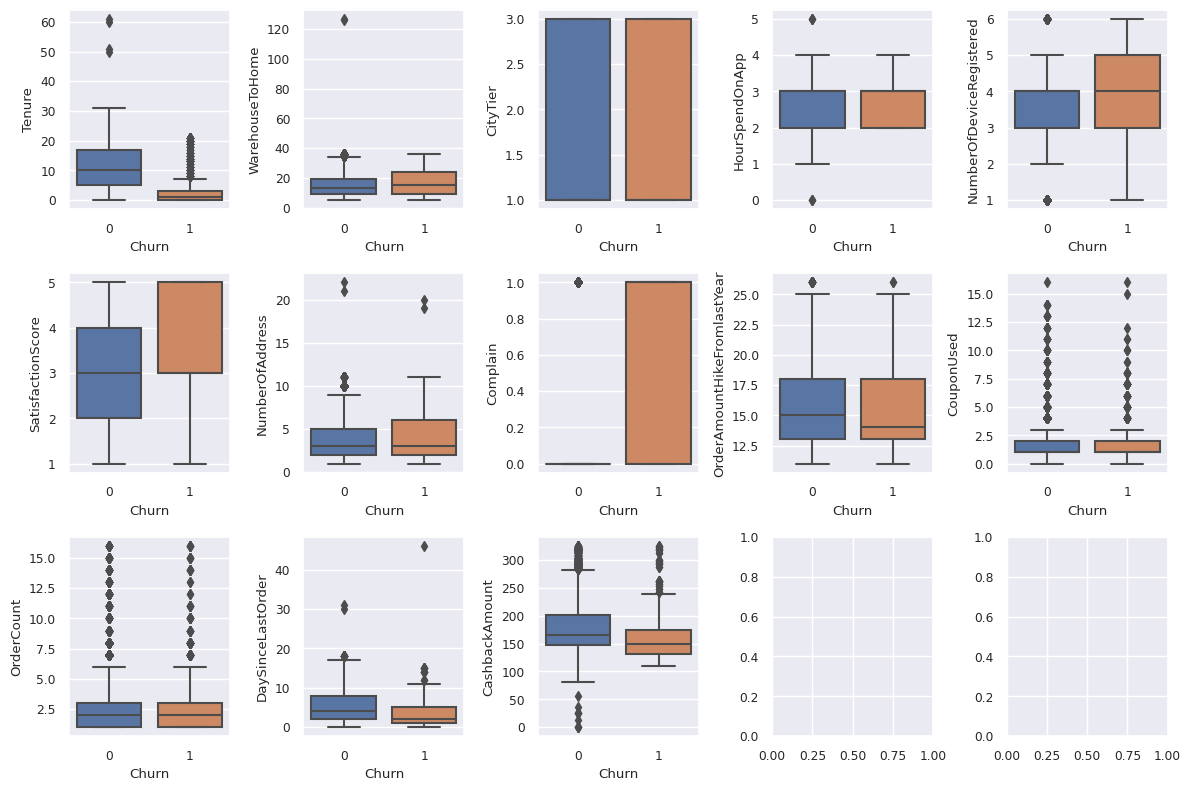

In [10]:
# Explore numerical data
# Boxplot (categorical-numercial)

sns.set(font_scale=0.8)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

sns.boxplot(data=df, x='Churn', y='Tenure', ax=axes[0,0])
sns.boxplot(data=df, x='Churn', y='WarehouseToHome', ax=axes[0,1])
sns.boxplot(data=df, x='Churn', y='CityTier', ax=axes[0,2])
sns.boxplot(data=df, x='Churn', y='HourSpendOnApp', ax=axes[0,3])
sns.boxplot(data=df, x='Churn', y='NumberOfDeviceRegistered', ax=axes[0,4])
sns.boxplot(data=df, x='Churn', y='SatisfactionScore', ax=axes[1,0])
sns.boxplot(data=df, x='Churn', y='NumberOfAddress', ax=axes[1,1])
sns.boxplot(data=df, x='Churn', y='Complain', ax=axes[1,2])
sns.boxplot(data=df, x='Churn', y='OrderAmountHikeFromlastYear', ax=axes[1,3])
sns.boxplot(data=df, x='Churn', y='CouponUsed', ax=axes[1,4])
sns.boxplot(data=df, x='Churn', y='OrderCount', ax=axes[2,0])
sns.boxplot(data=df, x='Churn', y='DaySinceLastOrder', ax=axes[2,1])
sns.boxplot(data=df, x='Churn', y='CashbackAmount', ax=axes[2,2])

plt.tight_layout()

plt.show()

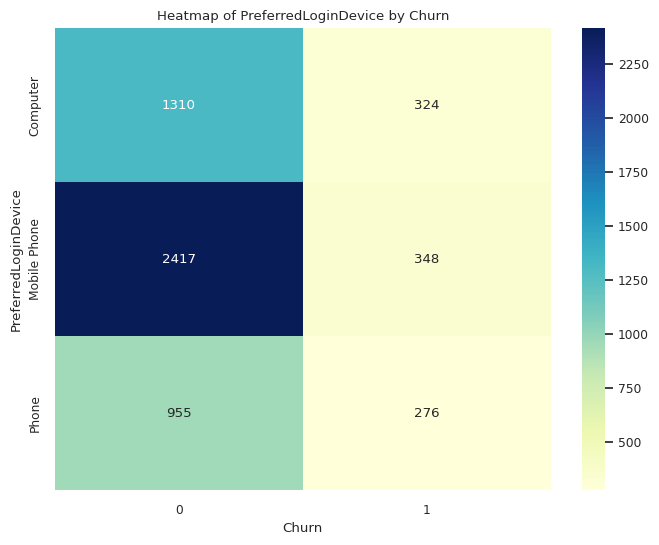

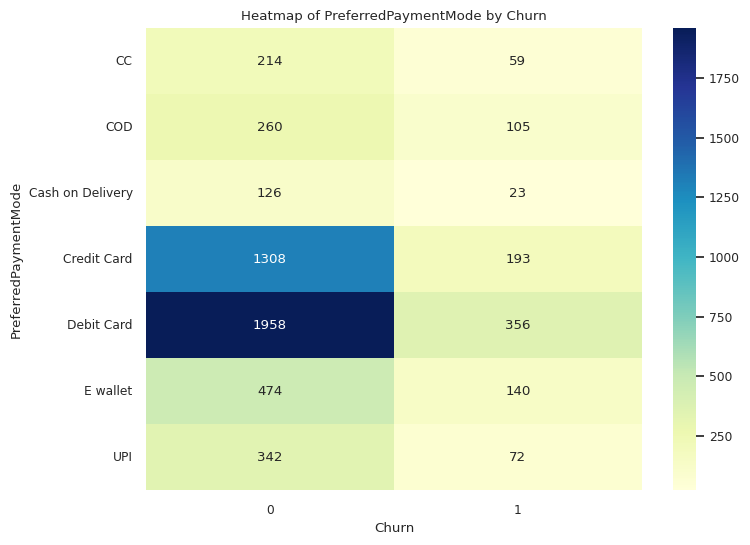

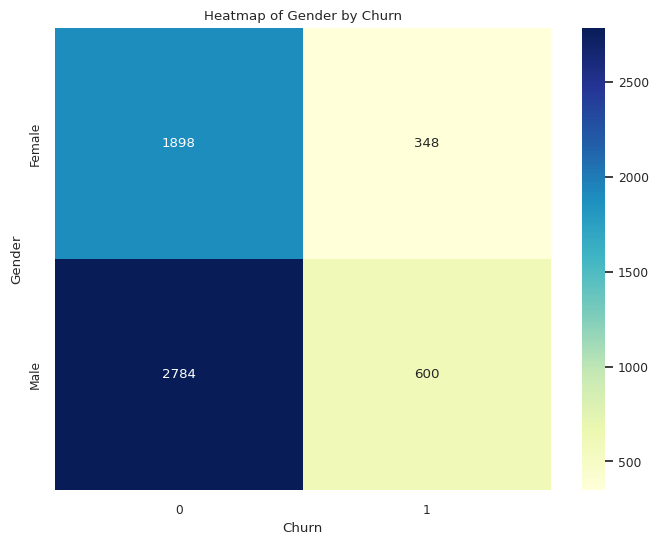

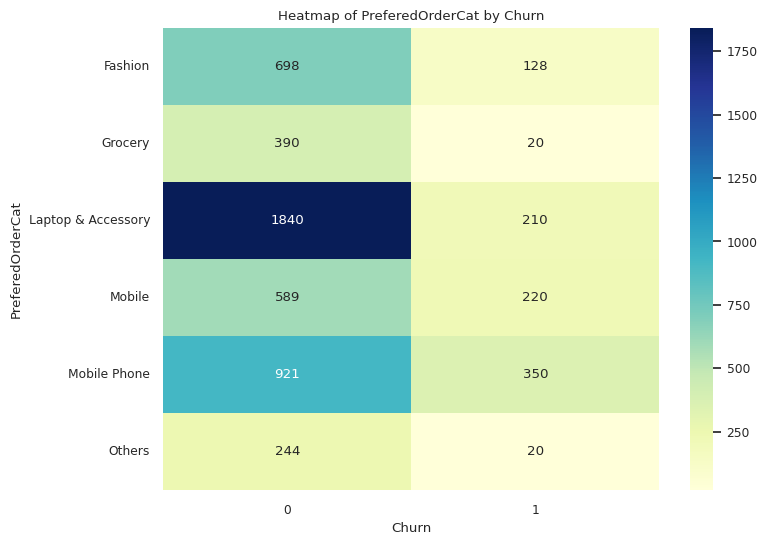

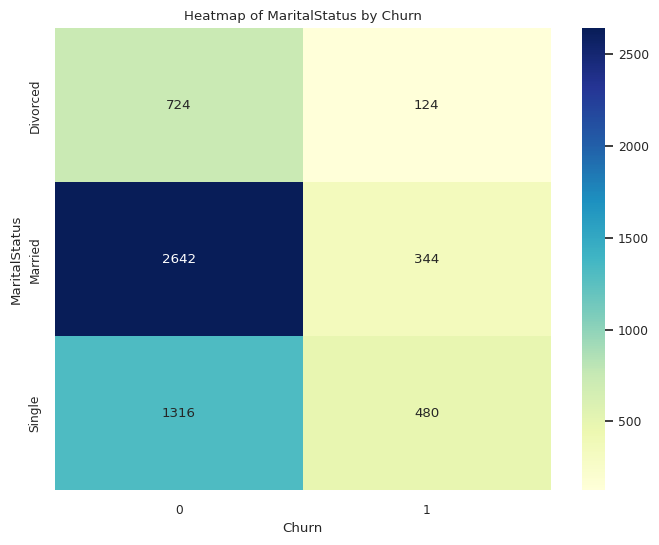

In [11]:
#Explore categorical data

# Loop through categorical features
for cat_feature in categorical_features:
    # Group and pivot data
    df_cat_by_target = df.groupby([cat_feature, 'Churn']).size().reset_index(name='No_of_customers').pivot(
        index=cat_feature, columns='Churn', values='No_of_customers')

    # Create a heatmap
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.heatmap(df_cat_by_target, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
    plt.title(f'Heatmap of {cat_feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(cat_feature)
    plt.show()

## Data processing

In [12]:
#Save null records as CSV
null_records = df[df.isnull().any(axis=1)]

output_filename = 'null_records.csv'

null_records.to_csv(output_filename, index=False)

print("Records with null values saved as", output_filename)

Records with null values saved as null_records.csv


In [13]:
#Drop null
df = df.dropna()

In [14]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [15]:
#Encode categorical data
cat_data = pd.DataFrame()

#Map for replacing value
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map({'Mobile Phone':0,
                             'Phone':1,
                             'Computer':2})

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].map({'Debit Card':0,
                             'COD':1,
                             'CC':2,
                             'Credit Card':3,
                             'E wallet':4,
                             'UPI':5,
                             'Cash on Delivery':6})

df['Gender'] = df['Gender'].map({'Female':0,
                             'Male':1})

df['PreferedOrderCat'] = df['PreferedOrderCat'].map({'Laptop & Accessory':0,
                             'Mobile Phone':1,
                             'Fashion':2,
                             'Mobile':3,
                             'Others':4,
                             'Grocery':5})

df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,
                             'Divorced':1,
                             'Married':2})

cat_data = pd.concat([cat_data, df['PreferredLoginDevice']], axis=1)
cat_data = pd.concat([cat_data, df['PreferredPaymentMode']], axis=1)
cat_data = pd.concat([cat_data, df['Gender']], axis=1)
cat_data = pd.concat([cat_data, df['PreferedOrderCat']], axis=1)
cat_data = pd.concat([cat_data, df['MaritalStatus']], axis=1)

cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,0,0,0,0,0
3,1,0,1,0,0
5,2,0,0,1,0
11,0,0,1,2,0
12,1,1,1,3,0
...,...,...,...,...,...
5624,0,5,0,1,0
5625,2,3,1,0,2
5627,0,0,1,0,2
5628,2,3,1,0,2


In [16]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Model creation and evaluation 1

In [17]:
#Use the selected features as X features

#X= df[['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']]
#y = df['Churn']

In [18]:
X = df[['Tenure', 'PreferredLoginDevice', 'WarehouseToHome', 'PreferredPaymentMode', 'CityTier', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
             'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
             'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]
y = df['Churn']

In [19]:
#Split train/test and identify startify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1885
           1       0.78      0.55      0.65       379

    accuracy                           0.90      2264
   macro avg       0.85      0.76      0.79      2264
weighted avg       0.89      0.90      0.89      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1258
           1       0.58      0.40      0.47       252

    accuracy                           0.85      1510
   macro avg       0.73      0.67      0.69      1510
weighted avg       0.84      0.85      0.84      1510



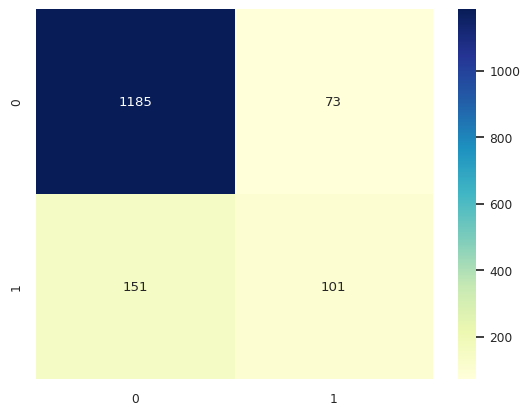

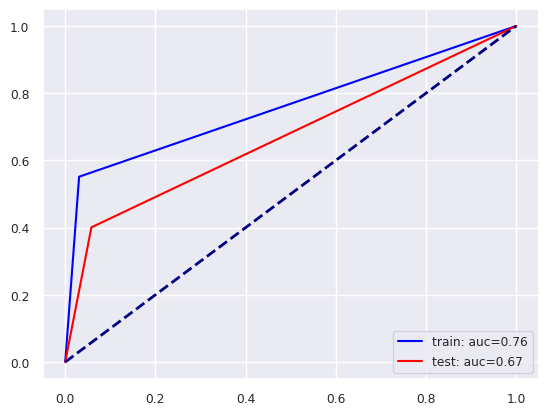

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1885
           1       0.74      0.54      0.62       379

    accuracy                           0.89      2264
   macro avg       0.83      0.75      0.78      2264
weighted avg       0.88      0.89      0.88      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1258
           1       0.74      0.51      0.60       252

    accuracy                           0.89      1510
   macro avg       0.82      0.74      0.77      1510
weighted avg       0.88      0.89      0.88      1510



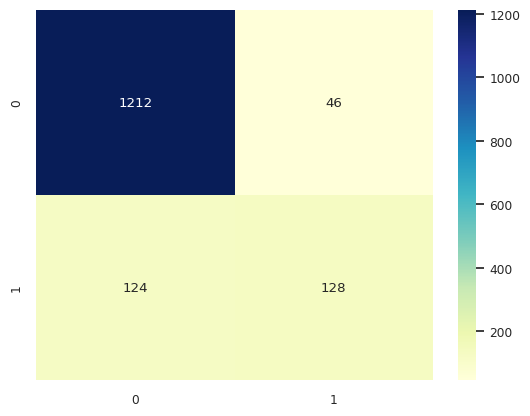

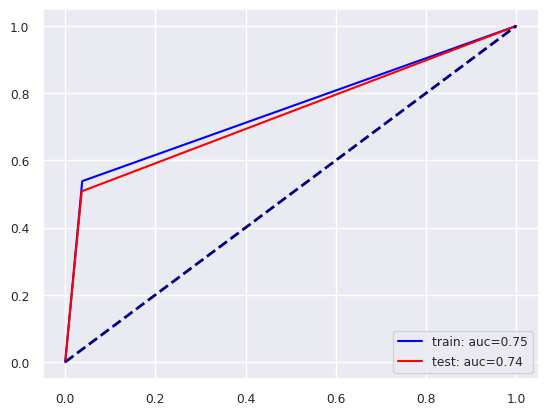

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1885
           1       0.92      0.78      0.84       379

    accuracy                           0.95      2264
   macro avg       0.94      0.88      0.91      2264
weighted avg       0.95      0.95      0.95      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1258
           1       0.82      0.65      0.73       252

    accuracy                           0.92      1510
   macro avg       0.88      0.81      0.84      1510
weighted avg       0.91      0.92      0.91      1510



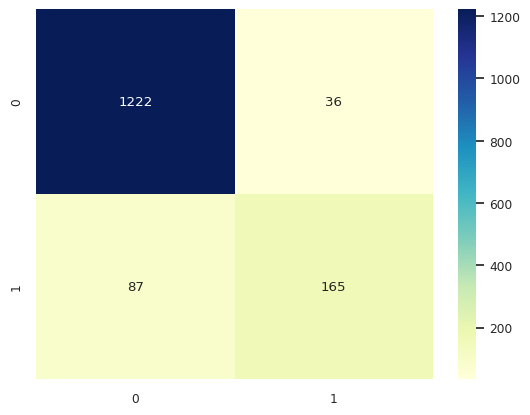

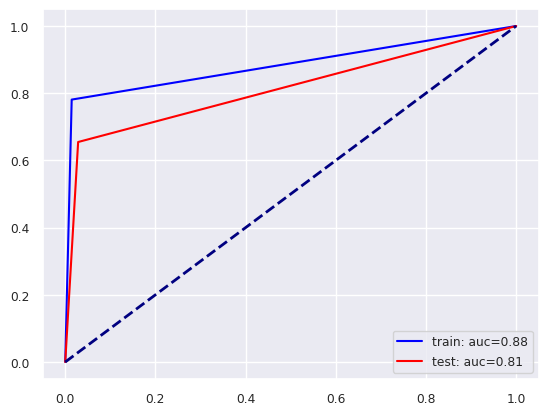

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00       379

    accuracy                           1.00      2264
   macro avg       1.00      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1258
           1       0.91      0.80      0.85       252

    accuracy                           0.95      1510
   macro avg       0.94      0.89      0.91      1510
weighted avg       0.95      0.95      0.95      1510



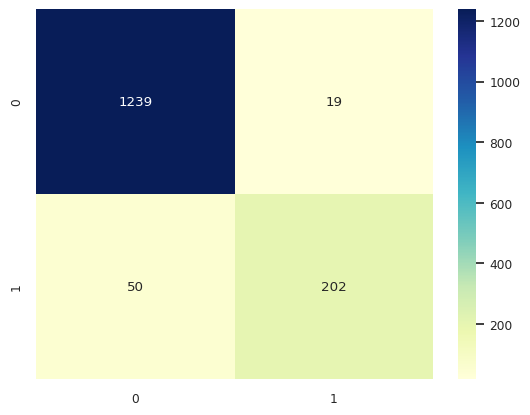

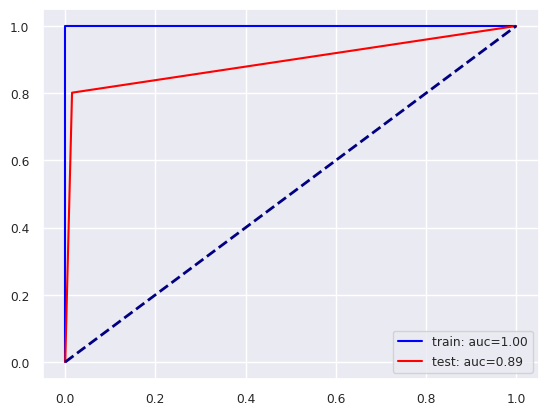

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1885
           1       1.00      0.97      0.98       379

    accuracy                           0.99      2264
   macro avg       1.00      0.98      0.99      2264
weighted avg       0.99      0.99      0.99      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1258
           1       0.89      0.74      0.81       252

    accuracy                           0.94      1510
   macro avg       0.92      0.86      0.89      1510
weighted avg       0.94      0.94      0.94      1510



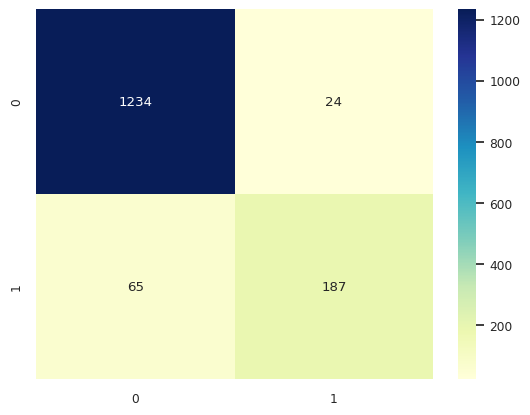

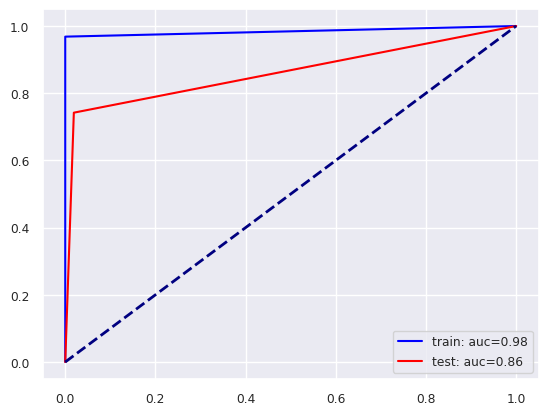

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1885
           1       0.68      0.56      0.62       379

    accuracy                           0.88      2264
   macro avg       0.80      0.76      0.77      2264
weighted avg       0.88      0.88      0.88      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1258
           1       0.66      0.51      0.58       252

    accuracy                           0.88      1510
   macro avg       0.79      0.73      0.75      1510
weighted avg       0.87      0.88      0.87      1510



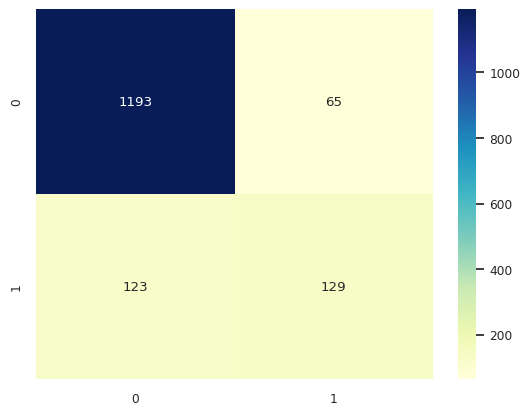

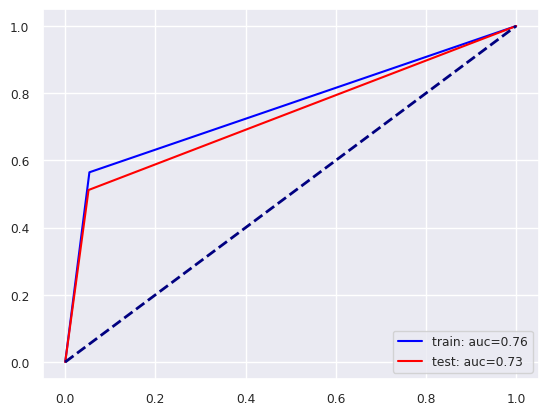

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00       379

    accuracy                           1.00      2264
   macro avg       1.00      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1258
           1       0.87      0.84      0.86       252

    accuracy                           0.95      1510
   macro avg       0.92      0.91      0.91      1510
weighted avg       0.95      0.95      0.95      1510



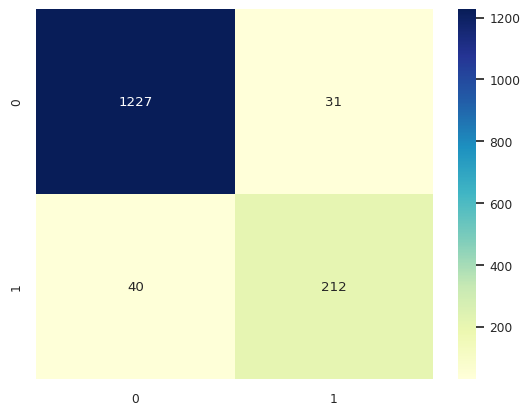

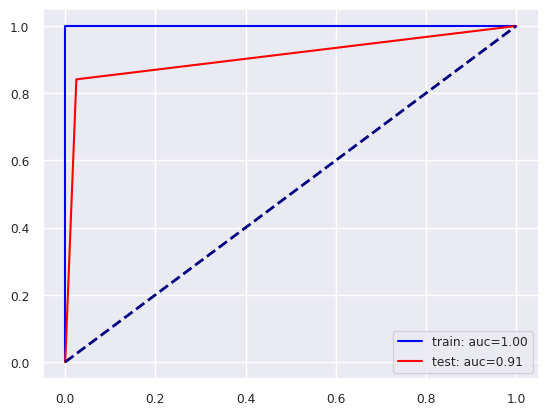

----------------------------------------------------------------------------------------------------
Best model: XGBoost, AUC: 0.91


In [20]:
# List of classifiers
classifiers = [
    [KNeighborsClassifier(n_neighbors=5), 'KneighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [xgb.XGBClassifier(), 'XGBoost']
]

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print(f"Classifier: {clf.__class__.__name__}")
    print("Train classification report:")
    print(classification_report(y_train, y_pred_train))
    print("Test classification report:")
    print(classification_report(y_test, y_pred_test))

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    plt.plot(fpr_train, tpr_train, color='Blue', label='train: auc=' + f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr_test, tpr_test, color='Red', label='test: auc=' + f'{auc_test:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

    return auc_test

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
    auc_test = fit_evaluate(clf, X_train, X_test, y_train, y_test)
    print('-' * 100)

    if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model: {best_model_name}, AUC: {best_score:.2f}")

## Resampling

### Undersampling

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       379
           1       0.81      0.82      0.81       379

    accuracy                           0.81       758
   macro avg       0.81      0.81      0.81       758
weighted avg       0.81      0.81      0.81       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1258
           1       0.36      0.77      0.49       252

    accuracy                           0.74      1510
   macro avg       0.65      0.75      0.66      1510
weighted avg       0.84      0.74      0.77      1510



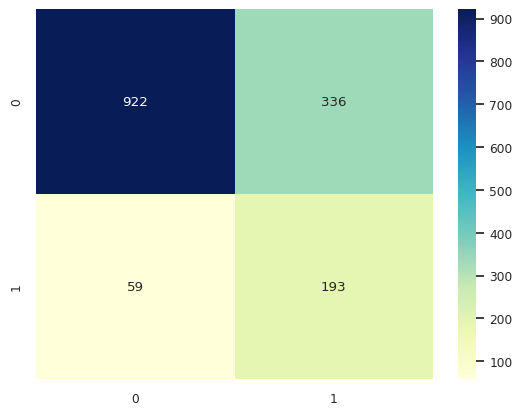

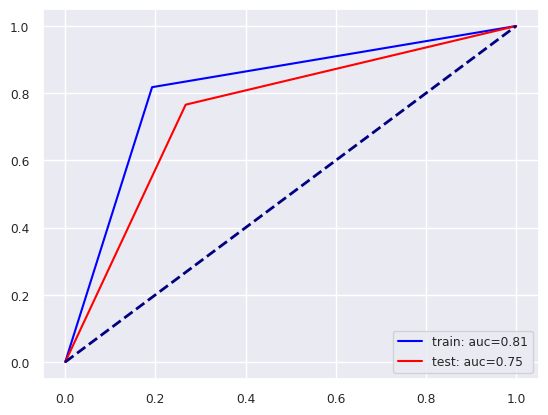

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       379
           1       0.81      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1258
           1       0.44      0.82      0.57       252

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.87      0.80      0.82      1510



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


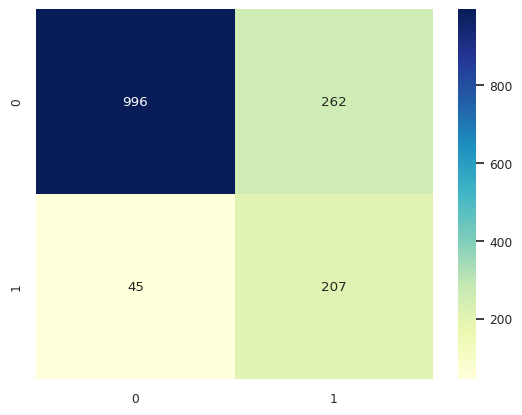

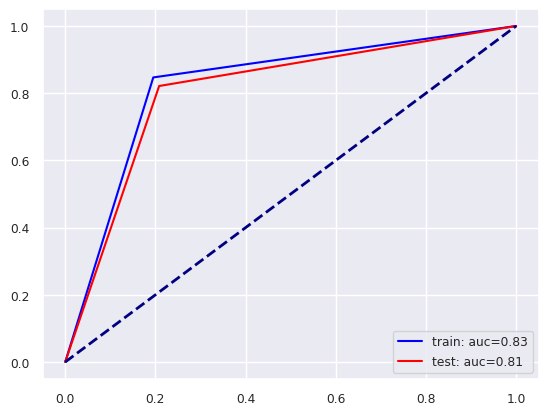

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.95      0.95      0.95       379

    accuracy                           0.95       758
   macro avg       0.95      0.95      0.95       758
weighted avg       0.95      0.95      0.95       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1258
           1       0.55      0.86      0.67       252

    accuracy                           0.86      1510
   macro avg       0.76      0.86      0.79      1510
weighted avg       0.90      0.86      0.87      1510



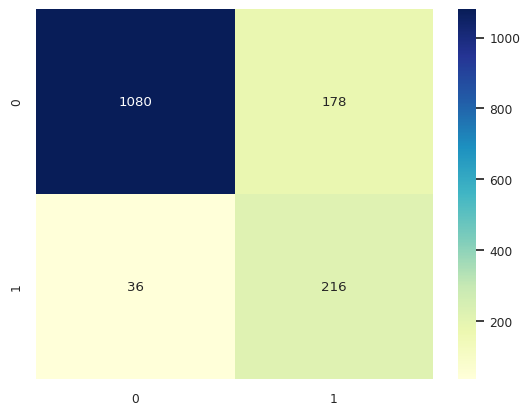

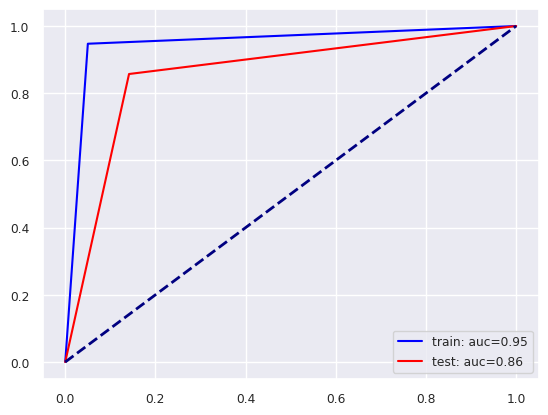

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1258
           1       0.59      0.91      0.72       252

    accuracy                           0.88      1510
   macro avg       0.78      0.89      0.82      1510
weighted avg       0.91      0.88      0.89      1510



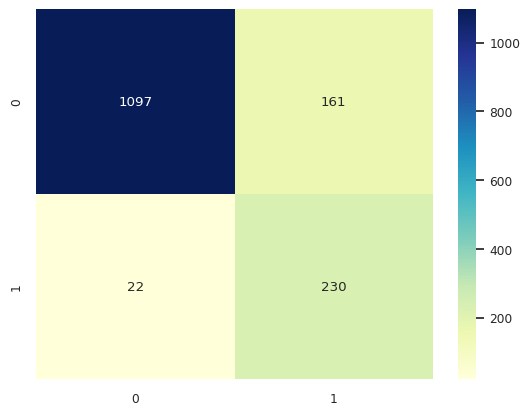

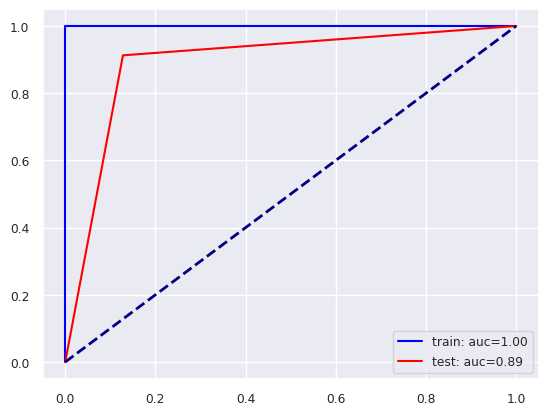

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1258
           1       0.57      0.89      0.69       252

    accuracy                           0.87      1510
   macro avg       0.77      0.88      0.80      1510
weighted avg       0.91      0.87      0.88      1510



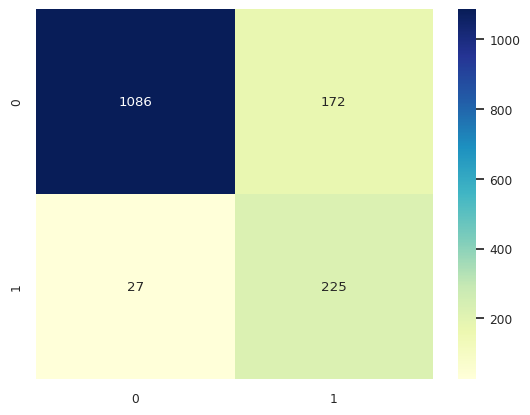

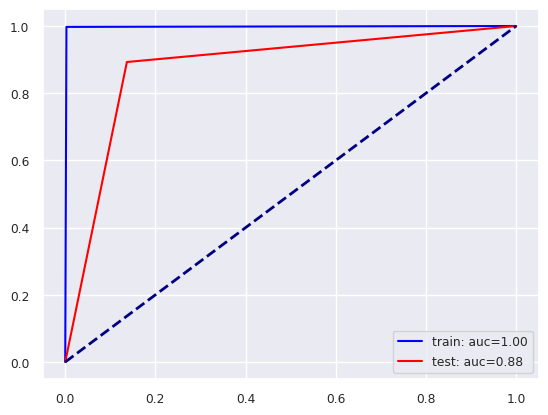

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       379
           1       0.77      0.85      0.81       379

    accuracy                           0.80       758
   macro avg       0.80      0.80      0.80       758
weighted avg       0.80      0.80      0.80       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1258
           1       0.36      0.81      0.50       252

    accuracy                           0.73      1510
   macro avg       0.66      0.76      0.66      1510
weighted avg       0.85      0.73      0.76      1510



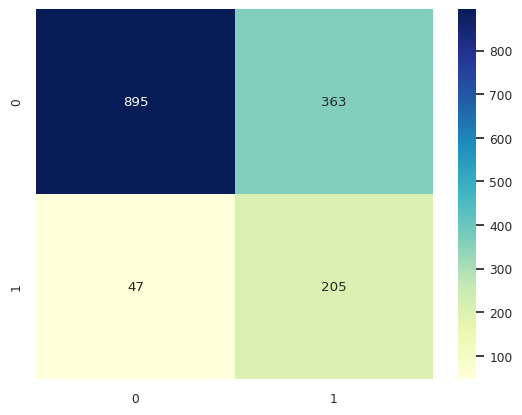

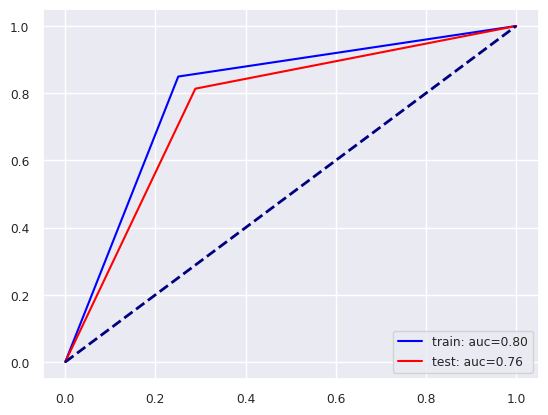

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1258
           1       0.57      0.92      0.70       252

    accuracy                           0.87      1510
   macro avg       0.77      0.89      0.81      1510
weighted avg       0.91      0.87      0.88      1510



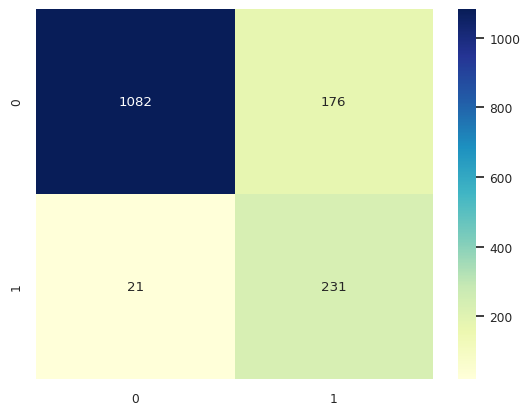

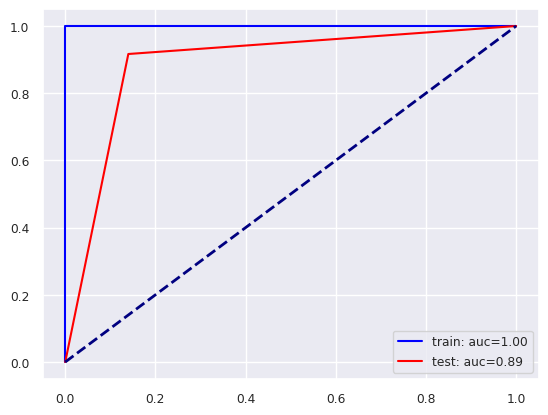

----------------------------------------------------------------------------------------------------
Best model with random undersampling: RandomForestClassifier, AUC: 0.89


In [21]:
rus = RandomUnderSampler(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
    X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

    # Evaluate the classifier with random undersampling
    auc_test = fit_evaluate(clf, X_undersampled, X_test, y_undersampled, y_test)
    print('-' * 100)

    if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

### Oversampling

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       379
           1       0.81      0.82      0.81       379

    accuracy                           0.81       758
   macro avg       0.81      0.81      0.81       758
weighted avg       0.81      0.81      0.81       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1258
           1       0.36      0.77      0.49       252

    accuracy                           0.74      1510
   macro avg       0.65      0.75      0.66      1510
weighted avg       0.84      0.74      0.77      1510



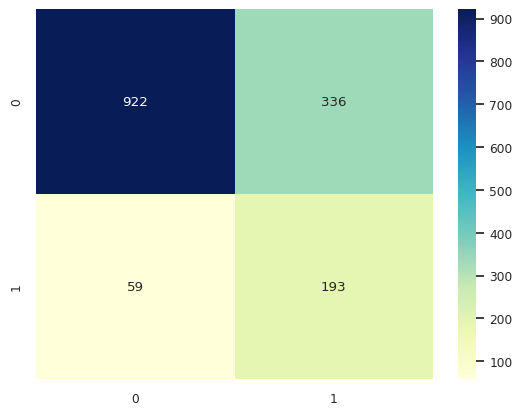

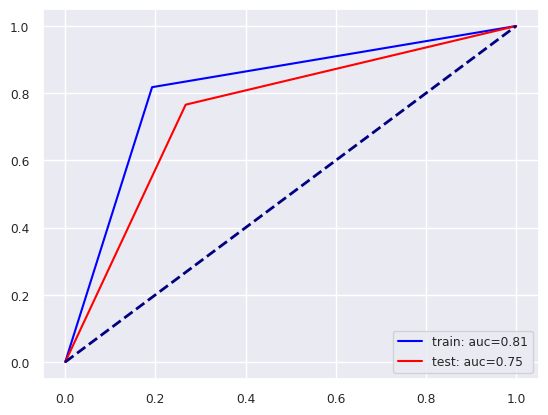

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       379
           1       0.81      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1258
           1       0.44      0.82      0.57       252

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.87      0.80      0.82      1510



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


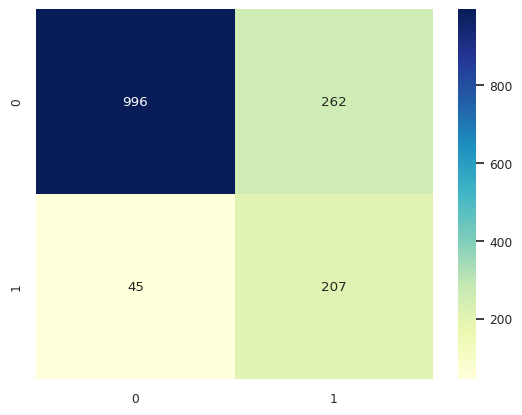

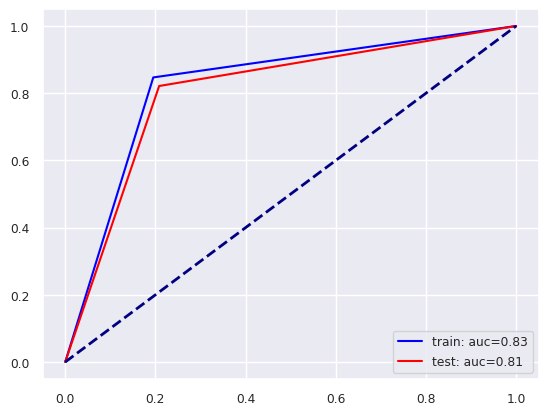

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.95      0.95      0.95       379

    accuracy                           0.95       758
   macro avg       0.95      0.95      0.95       758
weighted avg       0.95      0.95      0.95       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1258
           1       0.55      0.86      0.67       252

    accuracy                           0.86      1510
   macro avg       0.76      0.86      0.79      1510
weighted avg       0.90      0.86      0.87      1510



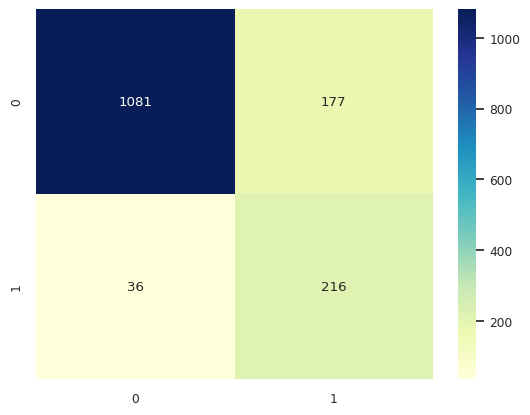

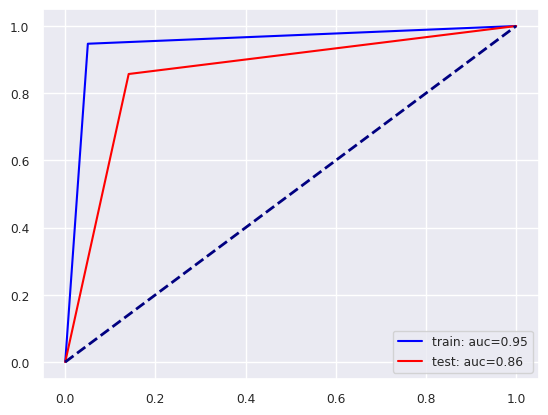

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1258
           1       0.59      0.92      0.72       252

    accuracy                           0.88      1510
   macro avg       0.78      0.89      0.82      1510
weighted avg       0.92      0.88      0.89      1510



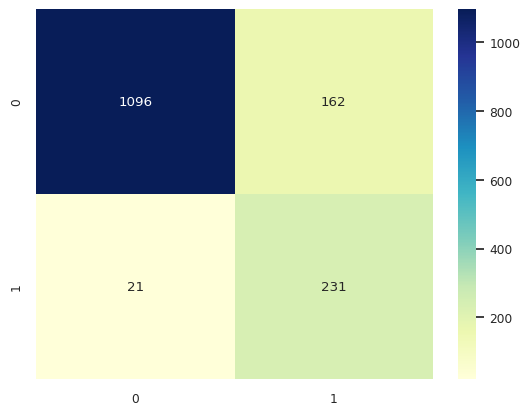

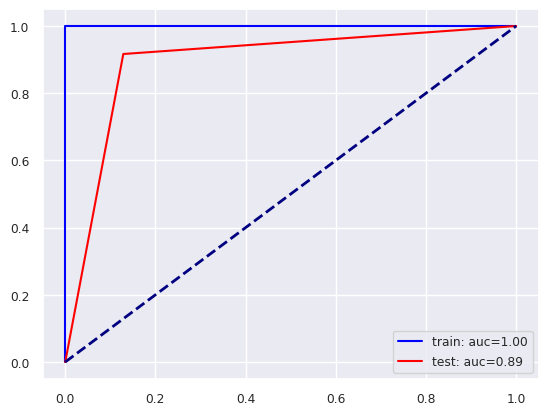

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       379
           1       1.00      0.99      0.99       379

    accuracy                           0.99       758
   macro avg       0.99      0.99      0.99       758
weighted avg       0.99      0.99      0.99       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1258
           1       0.59      0.90      0.71       252

    accuracy                           0.88      1510
   macro avg       0.78      0.89      0.82      1510
weighted avg       0.91      0.88      0.89      1510



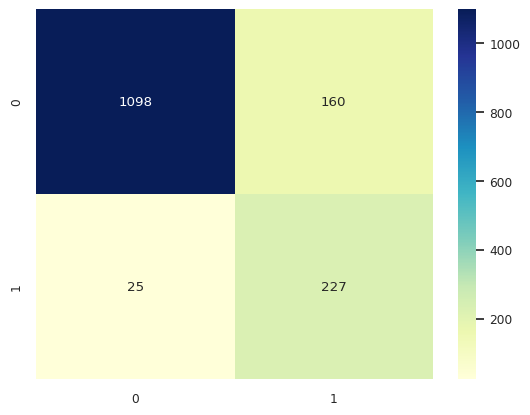

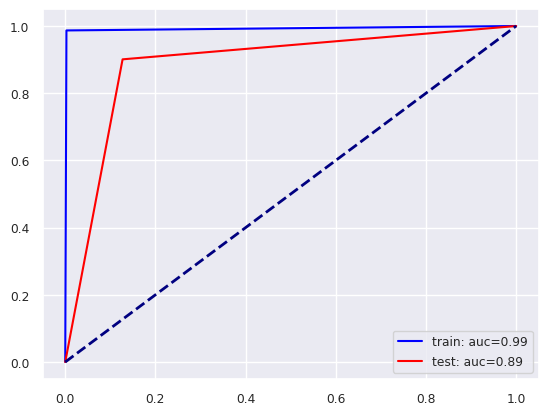

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       379
           1       0.77      0.85      0.81       379

    accuracy                           0.80       758
   macro avg       0.80      0.80      0.80       758
weighted avg       0.80      0.80      0.80       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1258
           1       0.36      0.81      0.50       252

    accuracy                           0.73      1510
   macro avg       0.66      0.76      0.66      1510
weighted avg       0.85      0.73      0.76      1510



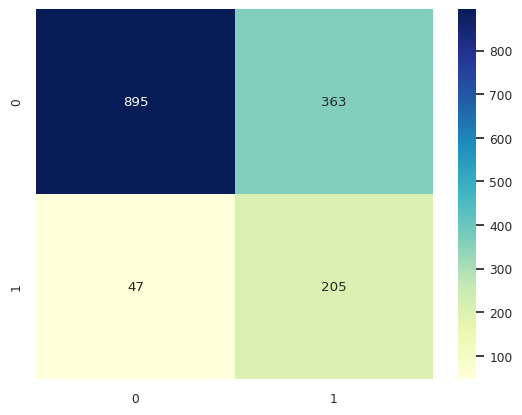

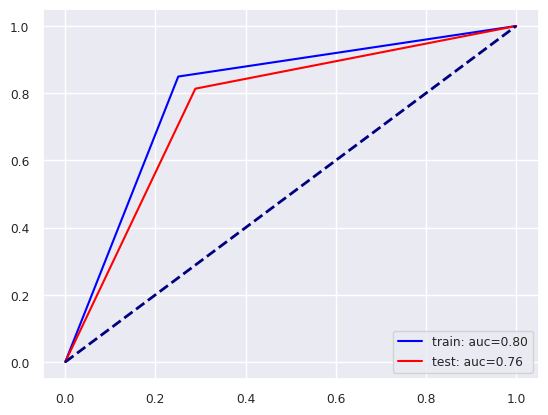

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1258
           1       0.57      0.92      0.70       252

    accuracy                           0.87      1510
   macro avg       0.77      0.89      0.81      1510
weighted avg       0.91      0.87      0.88      1510



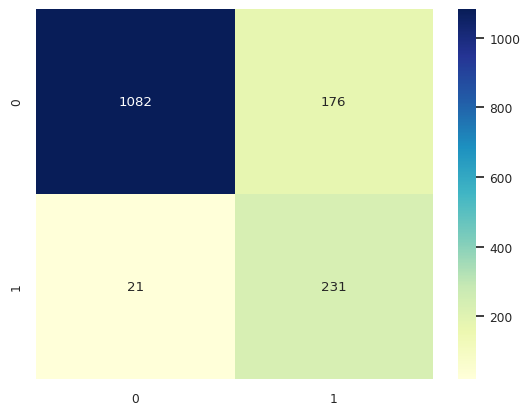

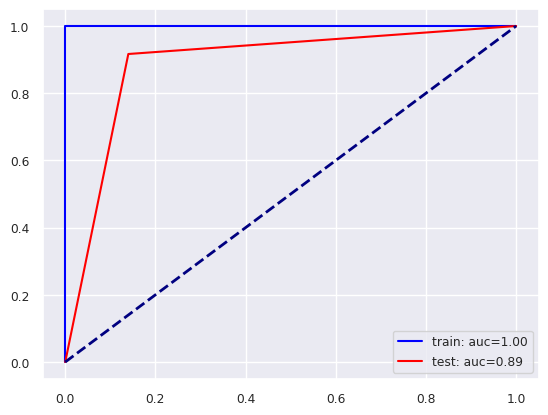

----------------------------------------------------------------------------------------------------
Best model with random undersampling: RandomForestClassifier, AUC: 0.89


In [22]:
ros = RandomOverSampler(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
  X_oversampled, y_oversampled = rus.fit_resample(X_train, y_train)

  # Evaluate the classifier with random undersampling
  auc_test = fit_evaluate(clf, X_oversampled, X_test, y_oversampled, y_test)
  print('-' * 100)

  if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

### SMOTE

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       379
           1       0.81      0.82      0.81       379

    accuracy                           0.81       758
   macro avg       0.81      0.81      0.81       758
weighted avg       0.81      0.81      0.81       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1258
           1       0.36      0.77      0.49       252

    accuracy                           0.74      1510
   macro avg       0.65      0.75      0.66      1510
weighted avg       0.84      0.74      0.77      1510



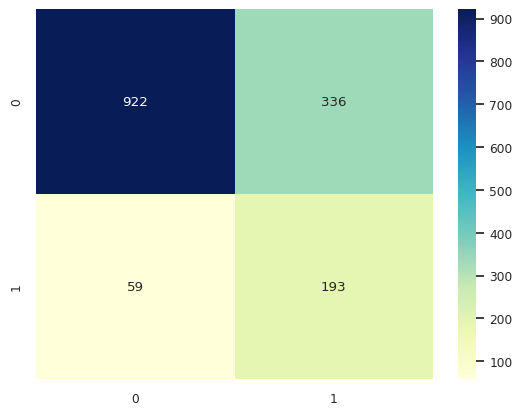

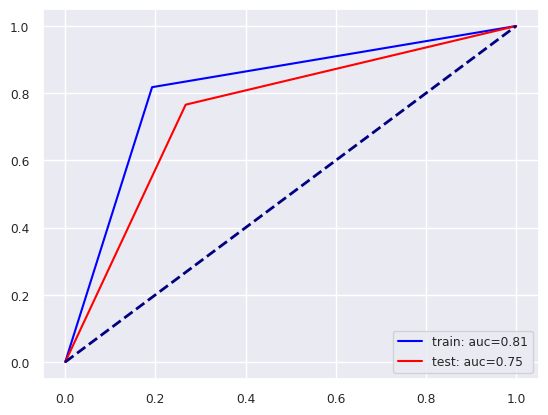

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       379
           1       0.81      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1258
           1       0.44      0.82      0.57       252

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.87      0.80      0.82      1510



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


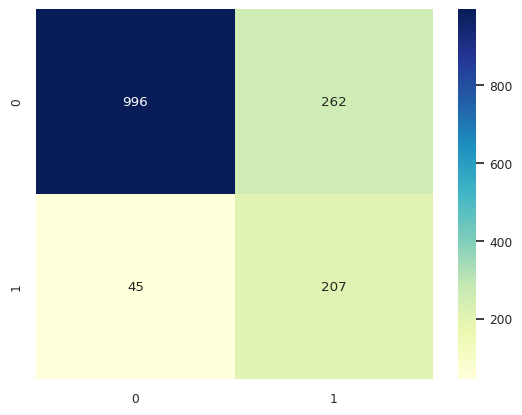

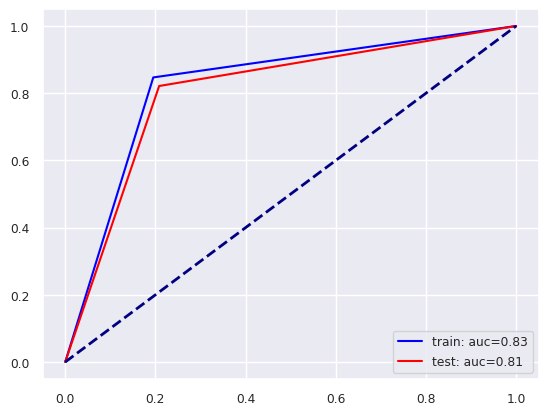

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.95      0.95      0.95       379

    accuracy                           0.95       758
   macro avg       0.95      0.95      0.95       758
weighted avg       0.95      0.95      0.95       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1258
           1       0.55      0.85      0.67       252

    accuracy                           0.86      1510
   macro avg       0.76      0.86      0.79      1510
weighted avg       0.90      0.86      0.87      1510



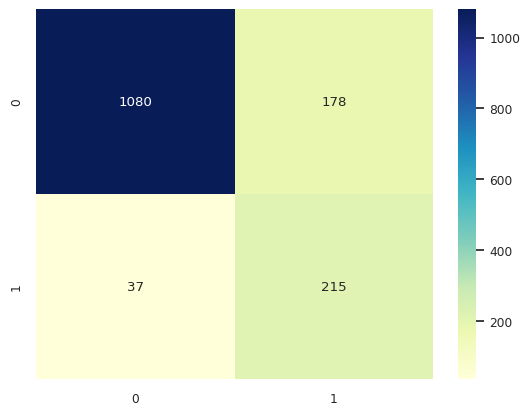

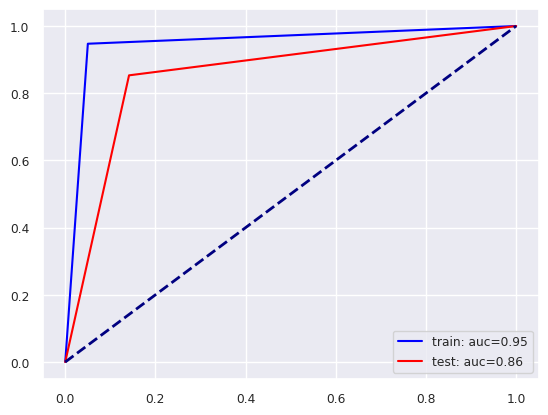

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1258
           1       0.59      0.93      0.72       252

    accuracy                           0.88      1510
   macro avg       0.79      0.90      0.82      1510
weighted avg       0.92      0.88      0.89      1510



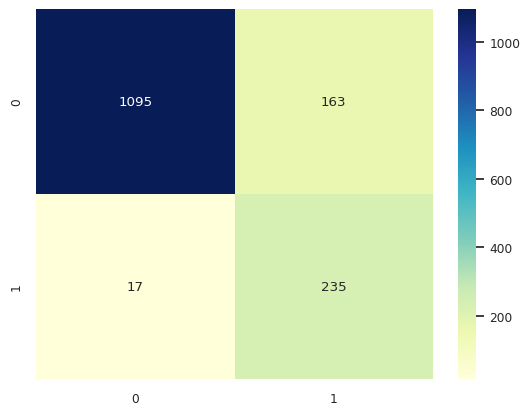

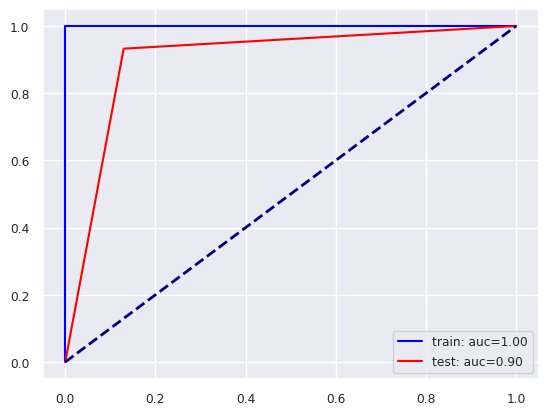

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       379
           1       1.00      0.99      0.99       379

    accuracy                           0.99       758
   macro avg       0.99      0.99      0.99       758
weighted avg       0.99      0.99      0.99       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92      1258
           1       0.57      0.88      0.69       252

    accuracy                           0.87      1510
   macro avg       0.77      0.87      0.80      1510
weighted avg       0.91      0.87      0.88      1510



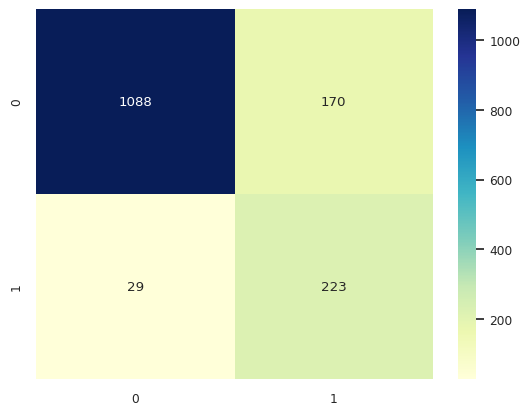

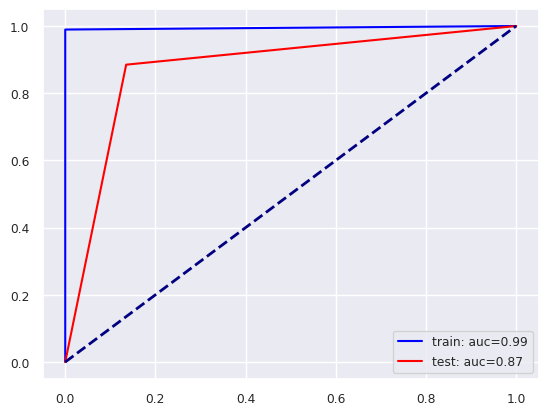

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       379
           1       0.77      0.85      0.81       379

    accuracy                           0.80       758
   macro avg       0.80      0.80      0.80       758
weighted avg       0.80      0.80      0.80       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1258
           1       0.36      0.81      0.50       252

    accuracy                           0.73      1510
   macro avg       0.66      0.76      0.66      1510
weighted avg       0.85      0.73      0.76      1510



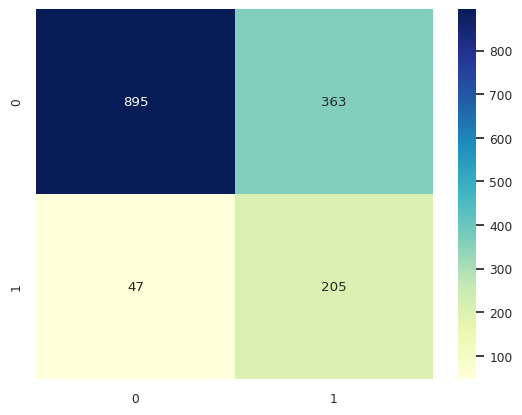

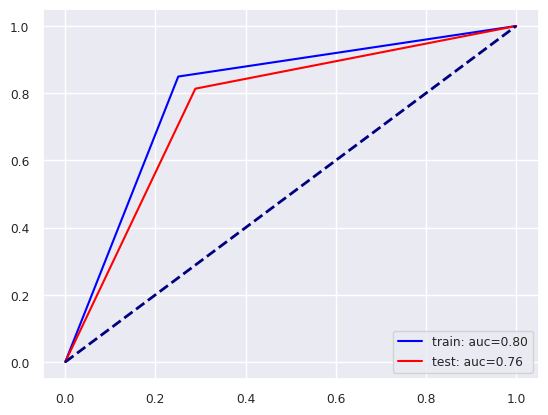

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1258
           1       0.57      0.92      0.70       252

    accuracy                           0.87      1510
   macro avg       0.77      0.89      0.81      1510
weighted avg       0.91      0.87      0.88      1510



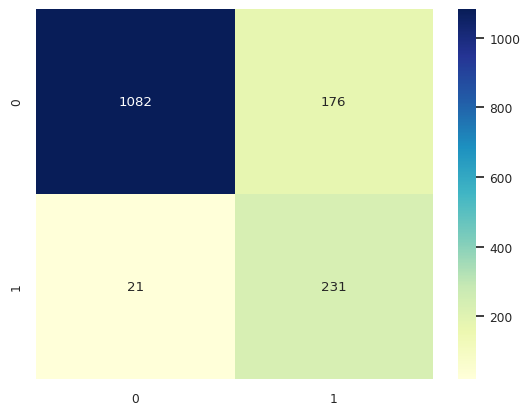

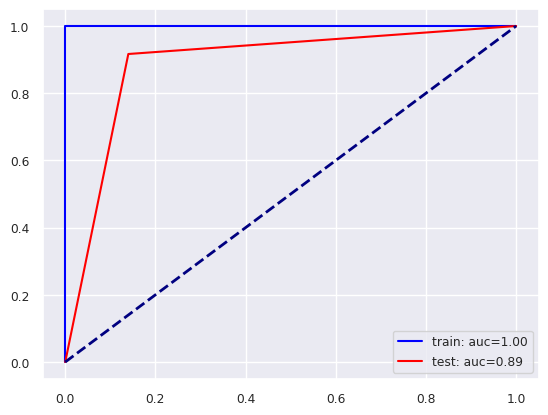

----------------------------------------------------------------------------------------------------
Best model with random undersampling: RandomForestClassifier, AUC: 0.90


In [23]:
smote = SMOTE(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
  X_train_SMOTE, y_train_SMOTE = rus.fit_resample(X_train, y_train)

  # Evaluate the classifier with random undersampling
  auc_test = fit_evaluate(clf, X_train_SMOTE, X_test, y_train_SMOTE, y_test)
  print('-' * 100)

  if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

## Feature importance

Feature Importance Ranking:
1. Tenure: 0.28990989923477173
2. Complain: 0.0793728232383728
3. NumberOfAddress: 0.06154234707355499
4. CityTier: 0.061507947742938995
5. PreferedOrderCat: 0.056000739336013794
6. SatisfactionScore: 0.04614933952689171
7. DaySinceLastOrder: 0.04567985609173775
8. CouponUsed: 0.042930491268634796
9. MaritalStatus: 0.040883783251047134
10. PreferredLoginDevice: 0.03826500475406647
11. OrderCount: 0.037522949278354645
12. NumberOfDeviceRegistered: 0.03638017922639847
13. WarehouseToHome: 0.034239448606967926
14. HourSpendOnApp: 0.0310794897377491
15. OrderAmountHikeFromlastYear: 0.027656227350234985
16. Gender: 0.027471370995044708
17. CashbackAmount: 0.025550400838255882
18. PreferredPaymentMode: 0.01785769686102867


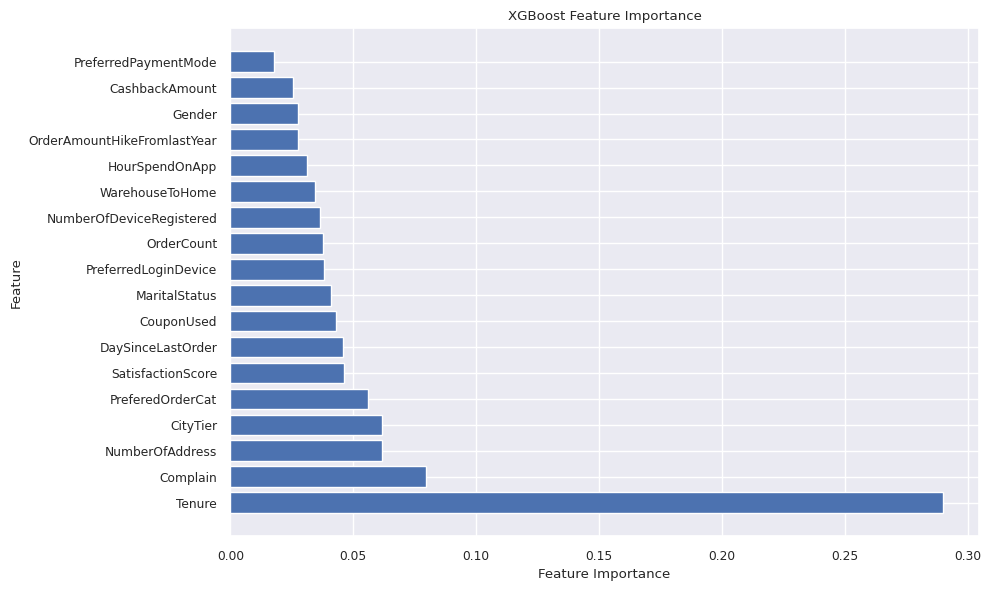

In [24]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the classifier to the data
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names
feature_names = X_train_SMOTE.columns

# Sort indices of features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i + 1}. {feature_names[idx]}: {feature_importances[idx]}")

# Plot feature importance horizontally
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.ylabel("Feature")
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()



## Feature selection

In [25]:
# Print feature importances
for feature, importance in enumerate(feature_importances):
    print(f"Feature {X_train_SMOTE.columns[feature]}: Importance = {importance:.4f}")

# Select the most important features
threshold = 0.075
selected_features = X_train_SMOTE.columns[np.where(feature_importances > threshold)]

print("Selected features:", selected_features)


Feature Tenure: Importance = 0.2899
Feature PreferredLoginDevice: Importance = 0.0383
Feature WarehouseToHome: Importance = 0.0342
Feature PreferredPaymentMode: Importance = 0.0179
Feature CityTier: Importance = 0.0615
Feature Gender: Importance = 0.0275
Feature HourSpendOnApp: Importance = 0.0311
Feature NumberOfDeviceRegistered: Importance = 0.0364
Feature PreferedOrderCat: Importance = 0.0560
Feature SatisfactionScore: Importance = 0.0461
Feature MaritalStatus: Importance = 0.0409
Feature NumberOfAddress: Importance = 0.0615
Feature Complain: Importance = 0.0794
Feature OrderAmountHikeFromlastYear: Importance = 0.0277
Feature CouponUsed: Importance = 0.0429
Feature OrderCount: Importance = 0.0375
Feature DaySinceLastOrder: Importance = 0.0457
Feature CashbackAmount: Importance = 0.0256
Selected features: Index(['Tenure', 'Complain'], dtype='object')


## Model creation and evaluation 2

In [31]:
# Choose only selected features

X = df[['Tenure', 'Complain']]
y = df['Churn']

#Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_train.shape, X_test.shape

((2264, 2), (1510, 2))

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1885
           1       0.75      0.40      0.52       379

    accuracy                           0.88      2264
   macro avg       0.82      0.69      0.72      2264
weighted avg       0.87      0.88      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1258
           1       0.72      0.40      0.52       252

    accuracy                           0.87      1510
   macro avg       0.80      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



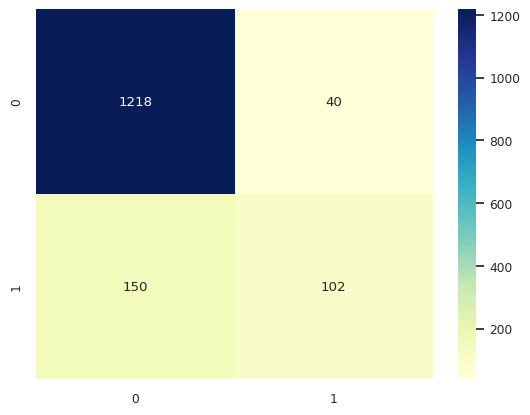

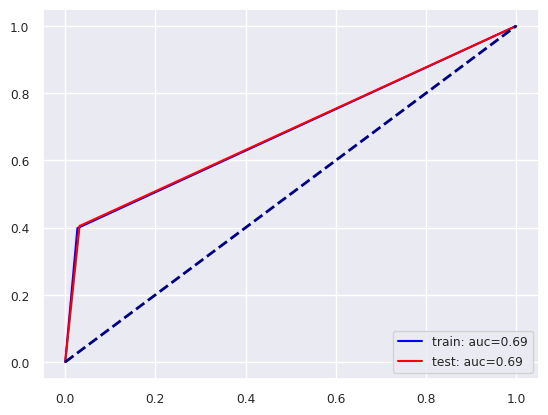

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1885
           1       0.69      0.41      0.52       379

    accuracy                           0.87      2264
   macro avg       0.79      0.69      0.72      2264
weighted avg       0.86      0.87      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1258
           1       0.69      0.41      0.51       252

    accuracy                           0.87      1510
   macro avg       0.79      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



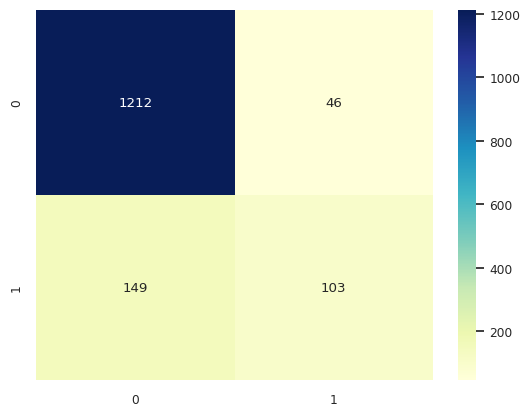

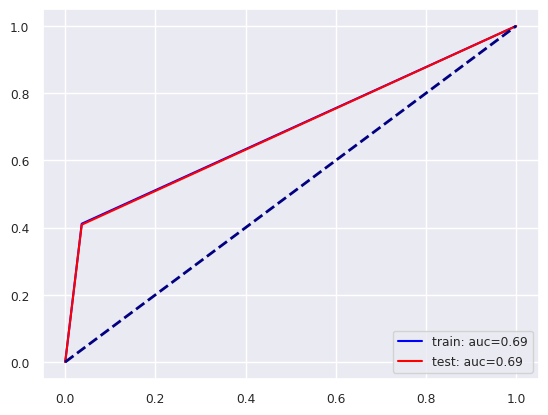

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1885
           1       0.75      0.40      0.52       379

    accuracy                           0.88      2264
   macro avg       0.82      0.69      0.72      2264
weighted avg       0.87      0.88      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1258
           1       0.72      0.40      0.52       252

    accuracy                           0.87      1510
   macro avg       0.80      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



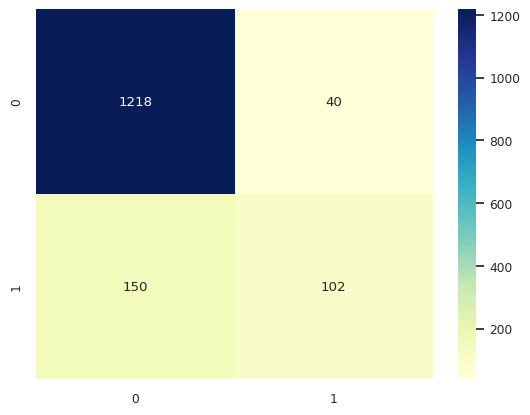

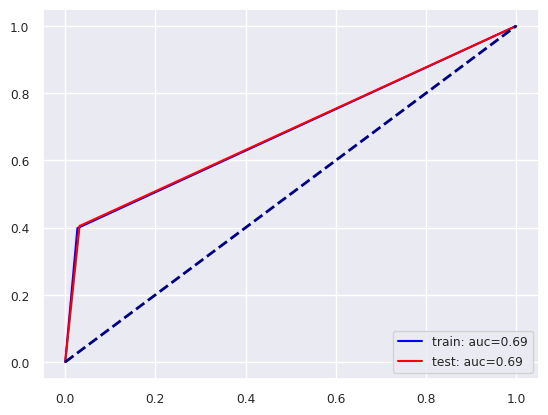

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1885
           1       0.75      0.40      0.52       379

    accuracy                           0.88      2264
   macro avg       0.82      0.69      0.72      2264
weighted avg       0.87      0.88      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1258
           1       0.72      0.40      0.52       252

    accuracy                           0.87      1510
   macro avg       0.80      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



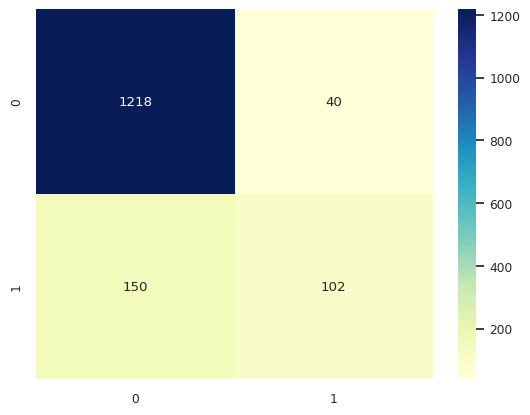

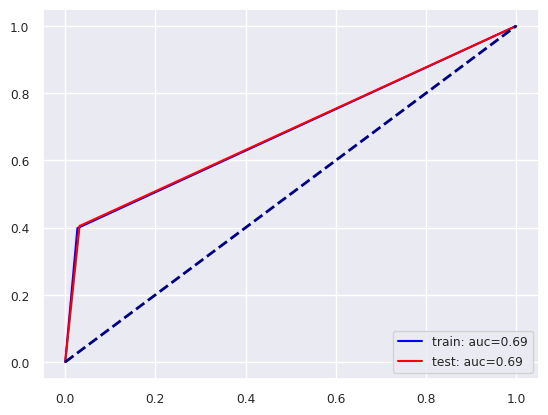

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1885
           1       0.75      0.40      0.52       379

    accuracy                           0.88      2264
   macro avg       0.82      0.69      0.72      2264
weighted avg       0.87      0.88      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1258
           1       0.72      0.40      0.52       252

    accuracy                           0.87      1510
   macro avg       0.80      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



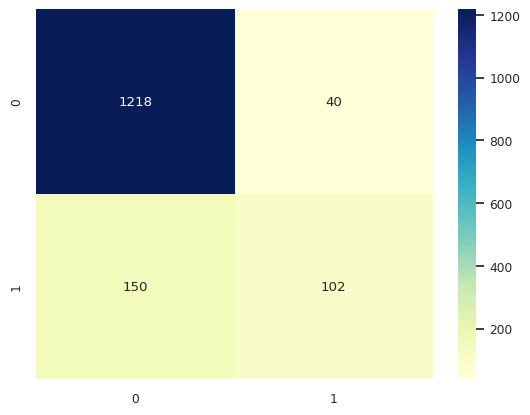

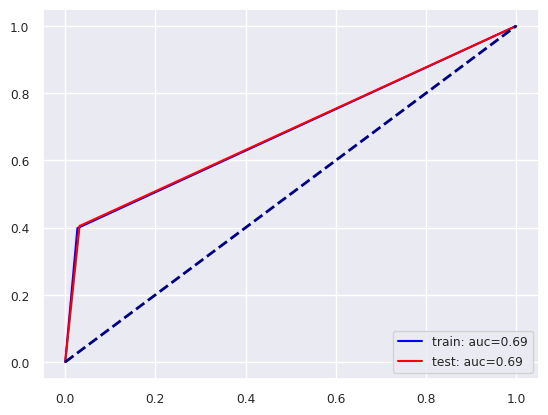

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1885
           1       0.62      0.44      0.52       379

    accuracy                           0.86      2264
   macro avg       0.76      0.69      0.72      2264
weighted avg       0.85      0.86      0.85      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1258
           1       0.60      0.42      0.50       252

    accuracy                           0.86      1510
   macro avg       0.75      0.68      0.71      1510
weighted avg       0.84      0.86      0.85      1510



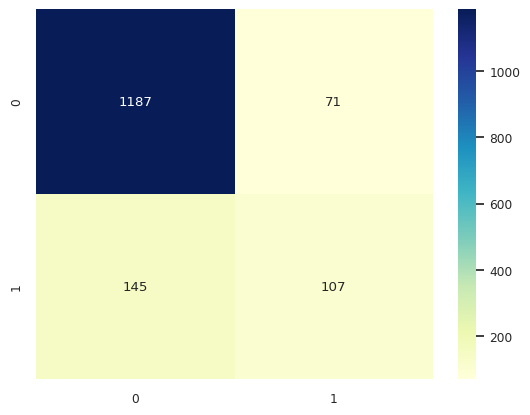

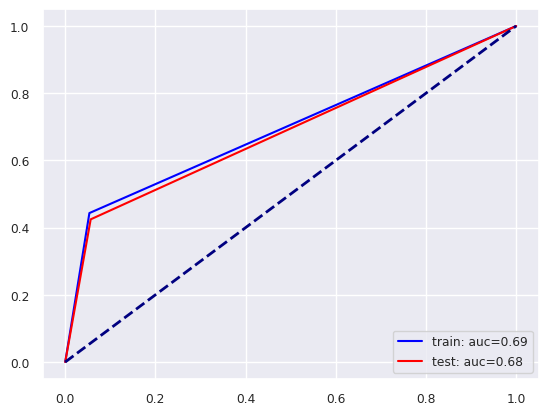

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1885
           1       0.75      0.40      0.52       379

    accuracy                           0.88      2264
   macro avg       0.82      0.69      0.72      2264
weighted avg       0.87      0.88      0.86      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1258
           1       0.72      0.40      0.52       252

    accuracy                           0.87      1510
   macro avg       0.80      0.69      0.72      1510
weighted avg       0.86      0.87      0.86      1510



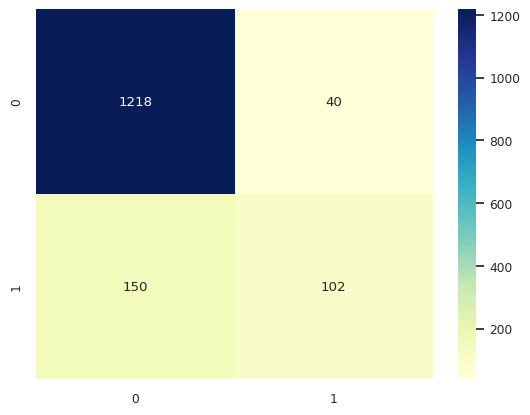

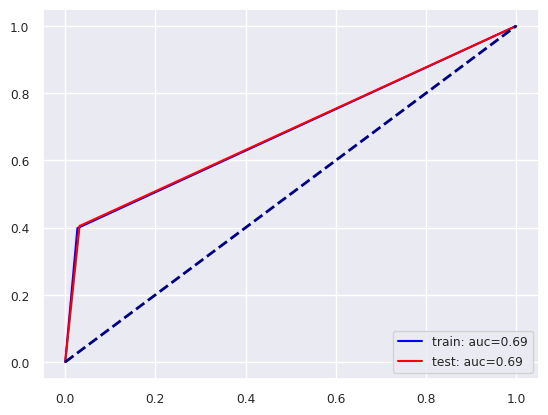

----------------------------------------------------------------------------------------------------
Best model: KneighborsClassifier, AUC: 0.69


In [32]:
# List of classifiers
classifiers = [
    [KNeighborsClassifier(n_neighbors=5), 'KneighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [xgb.XGBClassifier(), 'XGBoost']
]

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print(f"Classifier: {clf.__class__.__name__}")
    print("Train classification report:")
    print(classification_report(y_train, y_pred_train))
    print("Test classification report:")
    print(classification_report(y_test, y_pred_test))

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    plt.plot(fpr_train, tpr_train, color='Blue', label='train: auc=' + f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr_test, tpr_test, color='Red', label='test: auc=' + f'{auc_test:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

    return auc_test

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
    auc_test = fit_evaluate(clf, X_train, X_test, y_train, y_test)
    print('-' * 100)

    if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model: {best_model_name}, AUC: {best_score:.2f}")

## Resampling

### Undersampling

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       379
           1       0.87      0.33      0.48       379

    accuracy                           0.64       758
   macro avg       0.73      0.64      0.60       758
weighted avg       0.73      0.64      0.60       758

Test classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1258
           1       0.35      0.27      0.30       252

    accuracy                           0.79      1510
   macro avg       0.60      0.58      0.59      1510
weighted avg       0.77      0.79      0.78      1510



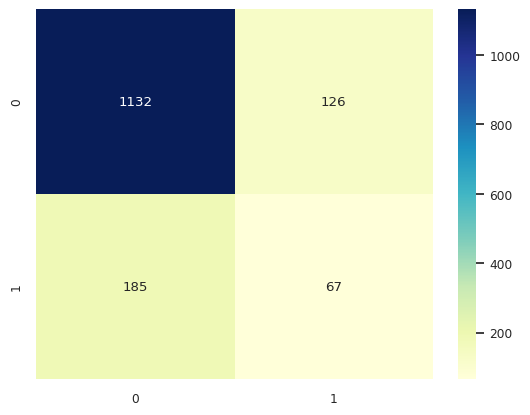

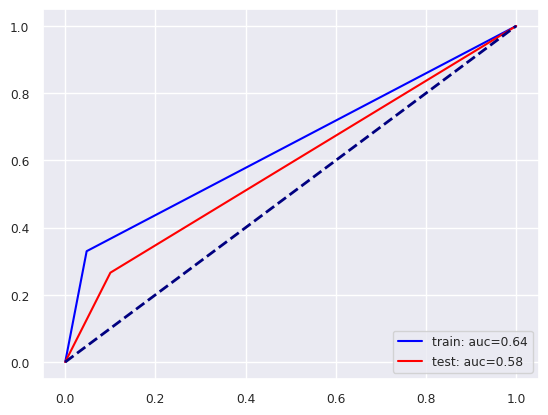

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       379
           1       0.75      0.86      0.80       379

    accuracy                           0.79       758
   macro avg       0.80      0.79      0.79       758
weighted avg       0.80      0.79      0.79       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      1258
           1       0.35      0.79      0.48       252

    accuracy                           0.72      1510
   macro avg       0.65      0.75      0.64      1510
weighted avg       0.84      0.72      0.75      1510



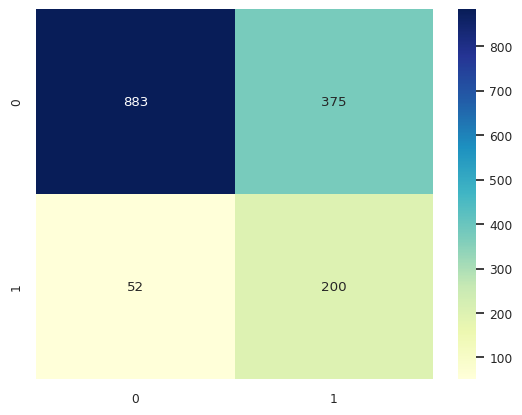

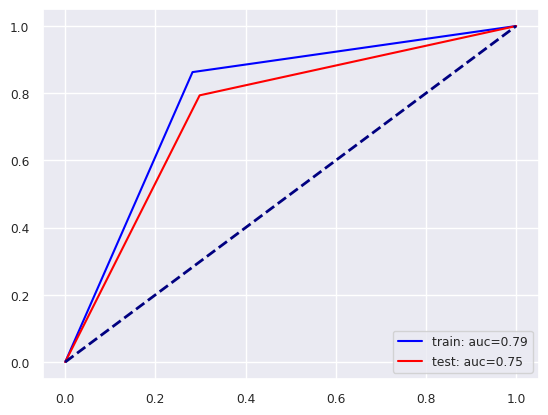

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       379
           1       0.83      0.86      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1258
           1       0.42      0.81      0.55       252

    accuracy                           0.78      1510
   macro avg       0.69      0.79      0.70      1510
weighted avg       0.86      0.78      0.81      1510



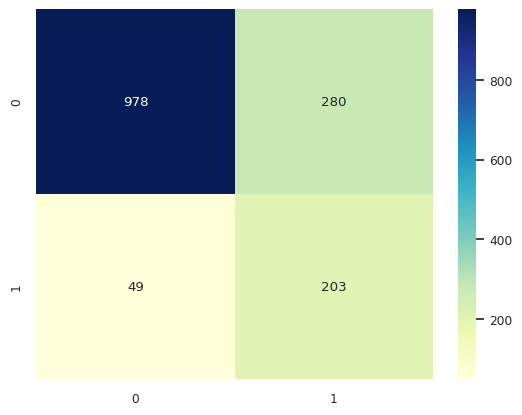

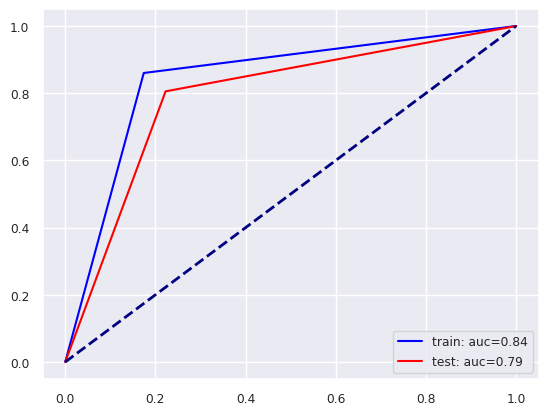

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       379
           1       0.82      0.88      0.85       379

    accuracy                           0.84       758
   macro avg       0.85      0.84      0.84       758
weighted avg       0.85      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1258
           1       0.39      0.82      0.53       252

    accuracy                           0.75      1510
   macro avg       0.67      0.78      0.68      1510
weighted avg       0.86      0.75      0.78      1510



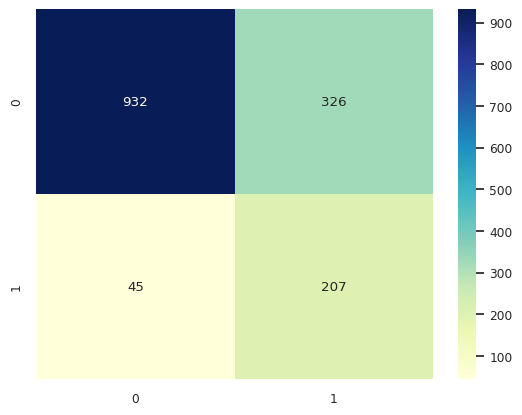

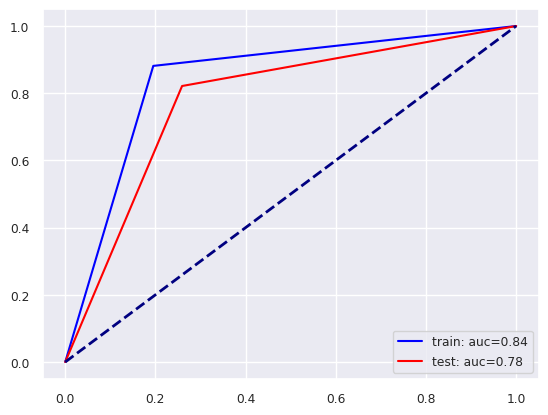

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       379
           1       0.84      0.85      0.84       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1258
           1       0.42      0.80      0.55       252

    accuracy                           0.78      1510
   macro avg       0.69      0.79      0.70      1510
weighted avg       0.86      0.78      0.81      1510



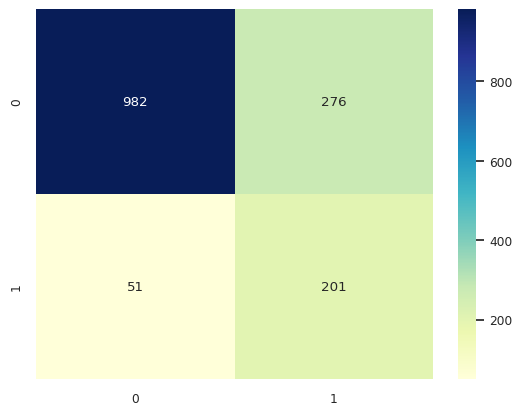

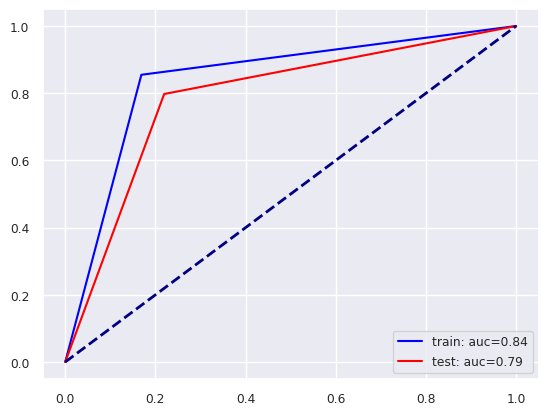

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       379
           1       0.71      0.87      0.78       379

    accuracy                           0.76       758
   macro avg       0.77      0.76      0.75       758
weighted avg       0.77      0.76      0.75       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1258
           1       0.29      0.81      0.43       252

    accuracy                           0.64      1510
   macro avg       0.62      0.71      0.58      1510
weighted avg       0.83      0.64      0.69      1510



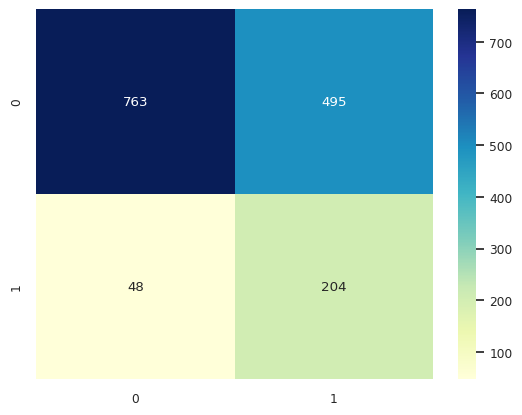

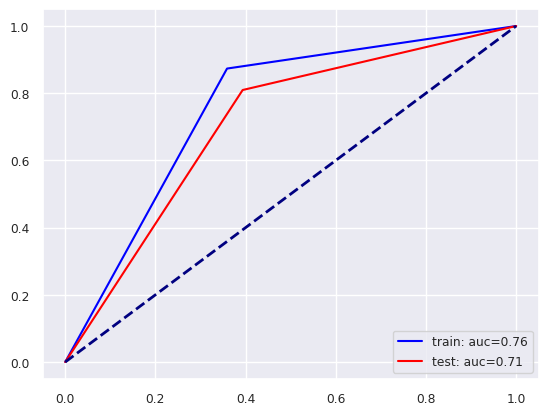

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       379
           1       0.82      0.87      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1258
           1       0.41      0.83      0.54       252

    accuracy                           0.77      1510
   macro avg       0.68      0.79      0.70      1510
weighted avg       0.86      0.77      0.80      1510



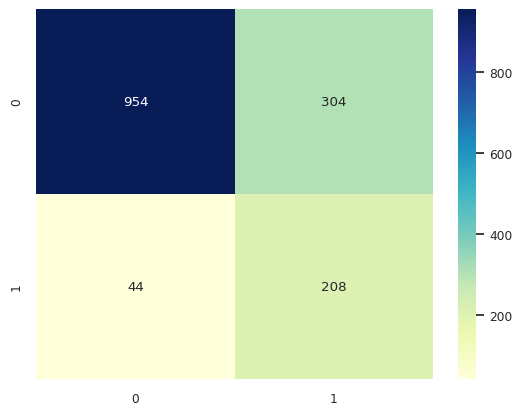

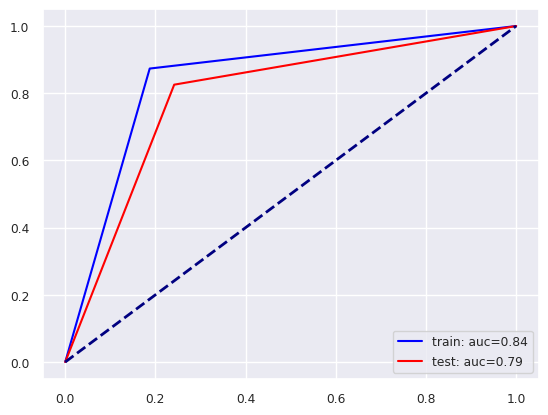

----------------------------------------------------------------------------------------------------
Best model with random undersampling: XGBoost, AUC: 0.79


In [33]:
rus = RandomUnderSampler(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
    X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

    # Evaluate the classifier with random undersampling
    auc_test = fit_evaluate(clf, X_undersampled, X_test, y_undersampled, y_test)
    print('-' * 100)

    if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

### Oversampling

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       379
           1       0.87      0.33      0.48       379

    accuracy                           0.64       758
   macro avg       0.73      0.64      0.60       758
weighted avg       0.73      0.64      0.60       758

Test classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1258
           1       0.35      0.27      0.30       252

    accuracy                           0.79      1510
   macro avg       0.60      0.58      0.59      1510
weighted avg       0.77      0.79      0.78      1510



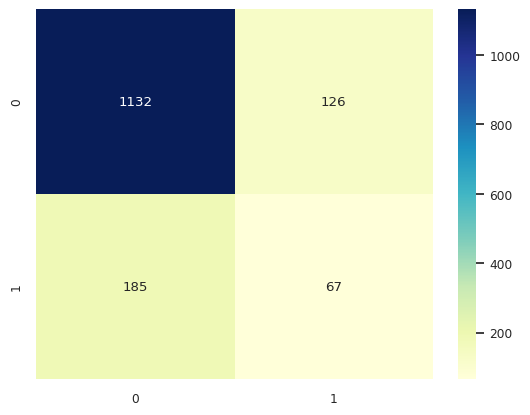

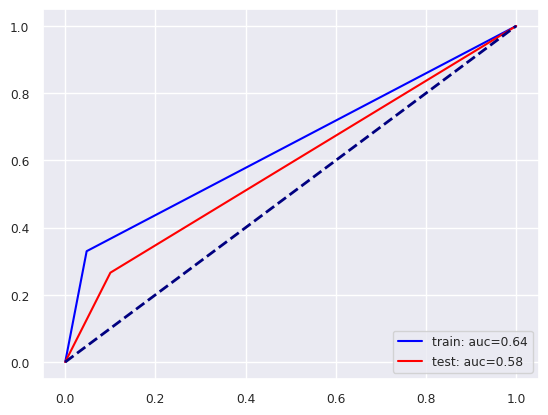

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       379
           1       0.75      0.86      0.80       379

    accuracy                           0.79       758
   macro avg       0.80      0.79      0.79       758
weighted avg       0.80      0.79      0.79       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      1258
           1       0.35      0.79      0.48       252

    accuracy                           0.72      1510
   macro avg       0.65      0.75      0.64      1510
weighted avg       0.84      0.72      0.75      1510



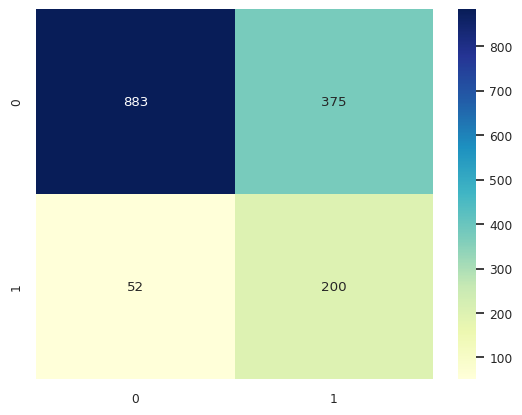

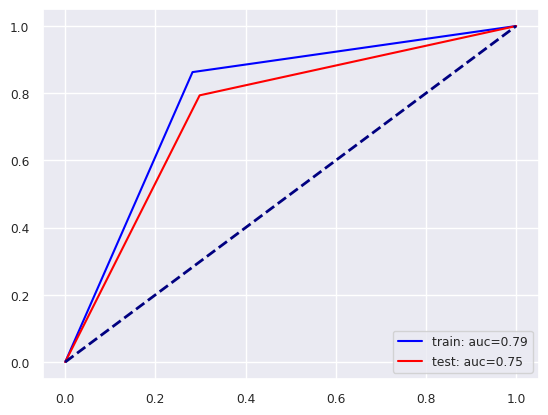

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       379
           1       0.83      0.86      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1258
           1       0.42      0.81      0.55       252

    accuracy                           0.78      1510
   macro avg       0.69      0.79      0.70      1510
weighted avg       0.86      0.78      0.81      1510



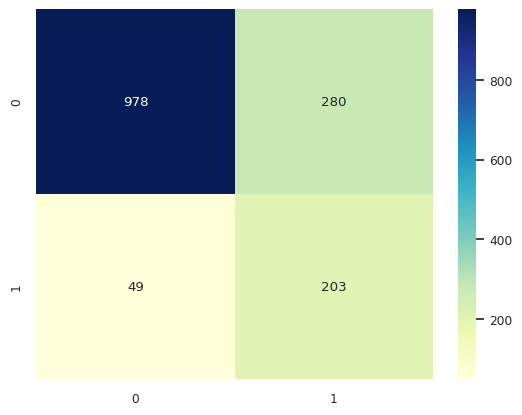

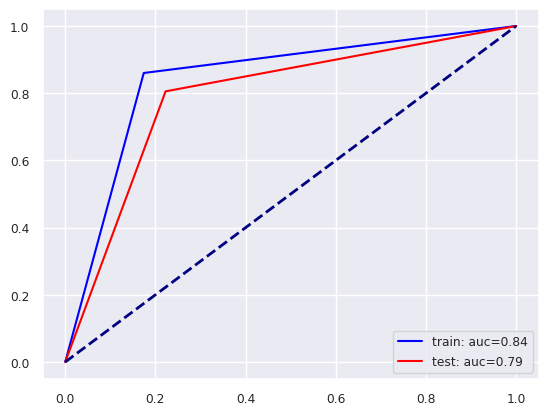

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       379
           1       0.84      0.85      0.84       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1258
           1       0.42      0.80      0.55       252

    accuracy                           0.78      1510
   macro avg       0.69      0.79      0.70      1510
weighted avg       0.86      0.78      0.81      1510



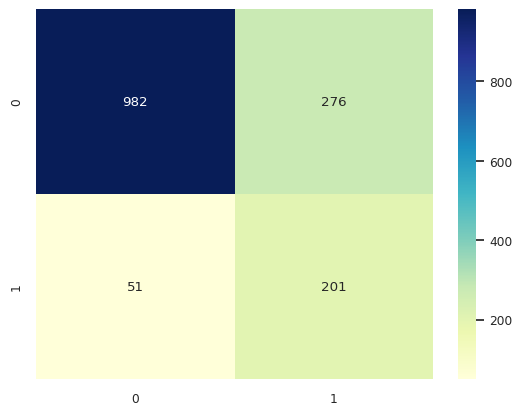

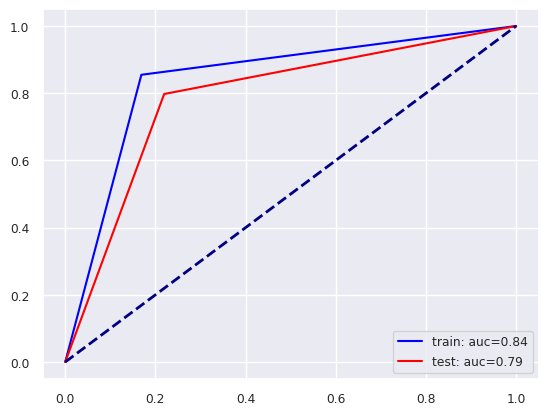

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       379
           1       0.82      0.87      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1258
           1       0.39      0.81      0.53       252

    accuracy                           0.76      1510
   macro avg       0.67      0.78      0.68      1510
weighted avg       0.86      0.76      0.79      1510



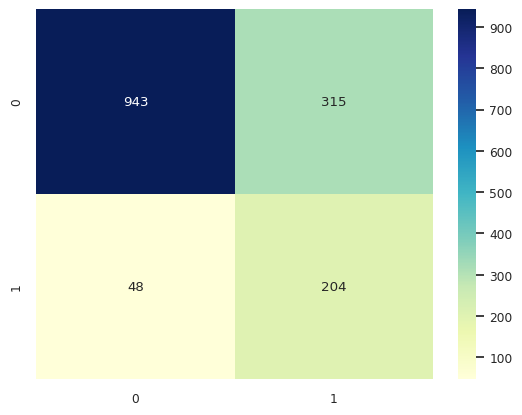

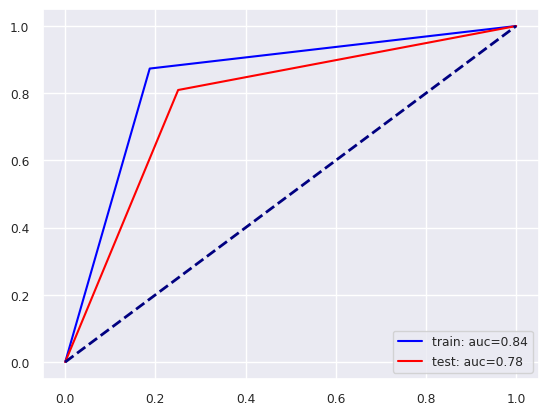

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       379
           1       0.71      0.87      0.78       379

    accuracy                           0.76       758
   macro avg       0.77      0.76      0.75       758
weighted avg       0.77      0.76      0.75       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1258
           1       0.29      0.81      0.43       252

    accuracy                           0.64      1510
   macro avg       0.62      0.71      0.58      1510
weighted avg       0.83      0.64      0.69      1510



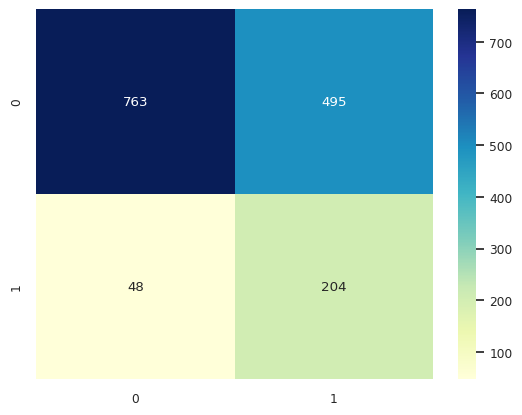

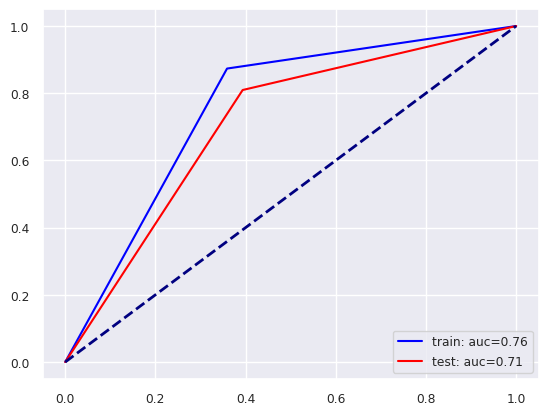

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       379
           1       0.82      0.87      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1258
           1       0.41      0.83      0.54       252

    accuracy                           0.77      1510
   macro avg       0.68      0.79      0.70      1510
weighted avg       0.86      0.77      0.80      1510



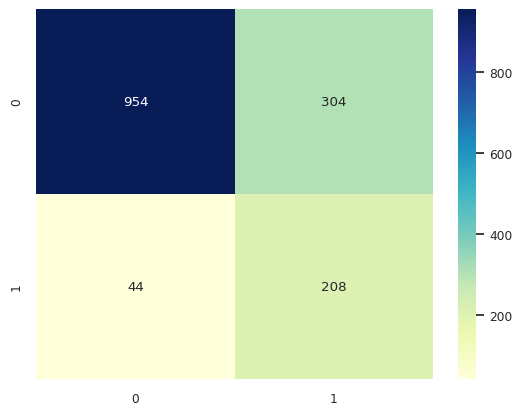

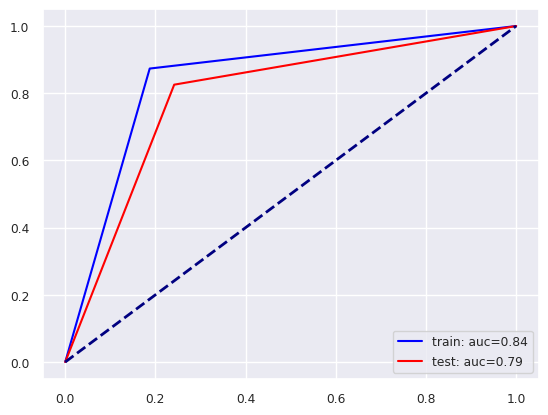

----------------------------------------------------------------------------------------------------
Best model with random undersampling: XGBoost, AUC: 0.79


In [34]:
ros = RandomOverSampler(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
  X_oversampled, y_oversampled = rus.fit_resample(X_train, y_train)

  # Evaluate the classifier with random undersampling
  auc_test = fit_evaluate(clf, X_oversampled, X_test, y_oversampled, y_test)
  print('-' * 100)

  if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

### SMOTE

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       379
           1       0.87      0.33      0.48       379

    accuracy                           0.64       758
   macro avg       0.73      0.64      0.60       758
weighted avg       0.73      0.64      0.60       758

Test classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1258
           1       0.35      0.27      0.30       252

    accuracy                           0.79      1510
   macro avg       0.60      0.58      0.59      1510
weighted avg       0.77      0.79      0.78      1510



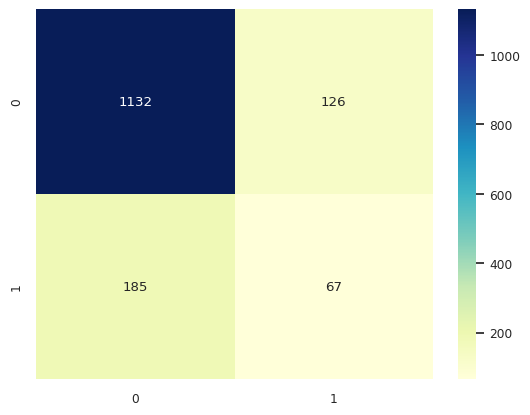

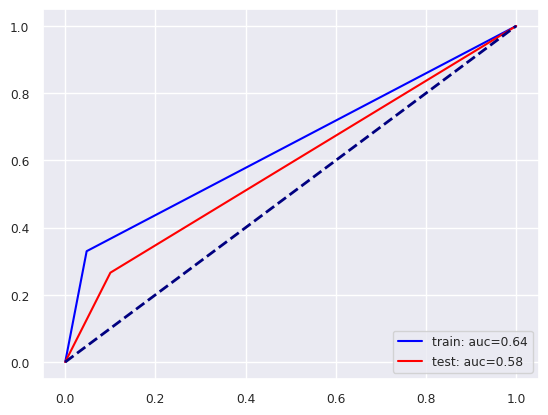

----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       379
           1       0.75      0.86      0.80       379

    accuracy                           0.79       758
   macro avg       0.80      0.79      0.79       758
weighted avg       0.80      0.79      0.79       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      1258
           1       0.35      0.79      0.48       252

    accuracy                           0.72      1510
   macro avg       0.65      0.75      0.64      1510
weighted avg       0.84      0.72      0.75      1510



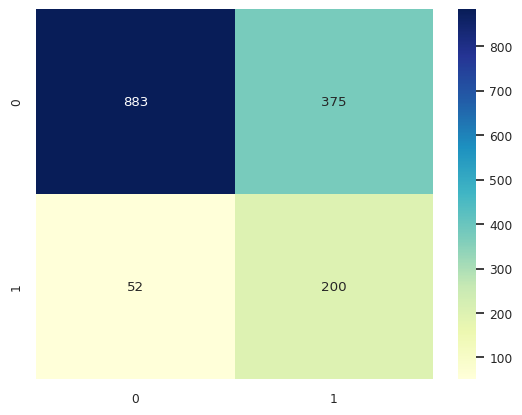

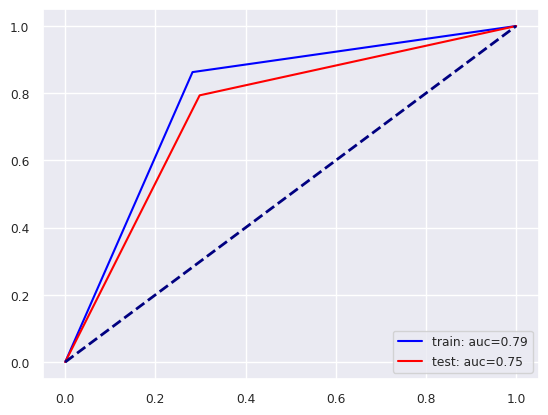

----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       379
           1       0.83      0.86      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1258
           1       0.42      0.81      0.55       252

    accuracy                           0.78      1510
   macro avg       0.69      0.79      0.70      1510
weighted avg       0.86      0.78      0.81      1510



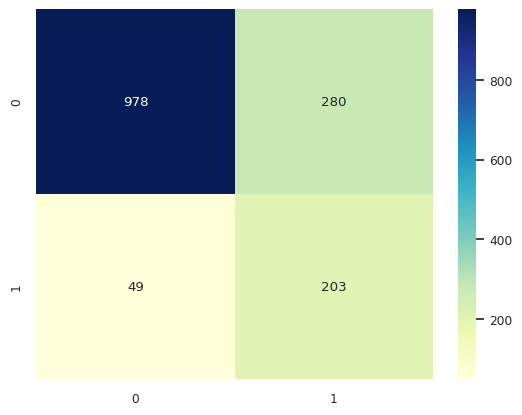

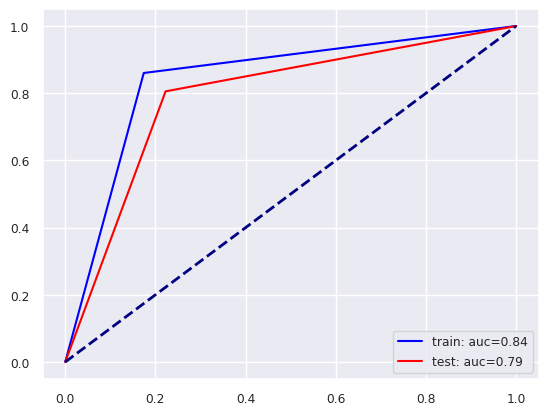

----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       379
           1       0.83      0.87      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1258
           1       0.41      0.82      0.54       252

    accuracy                           0.77      1510
   macro avg       0.68      0.79      0.70      1510
weighted avg       0.86      0.77      0.80      1510



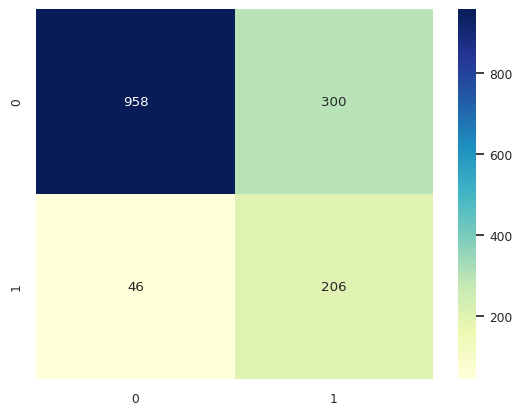

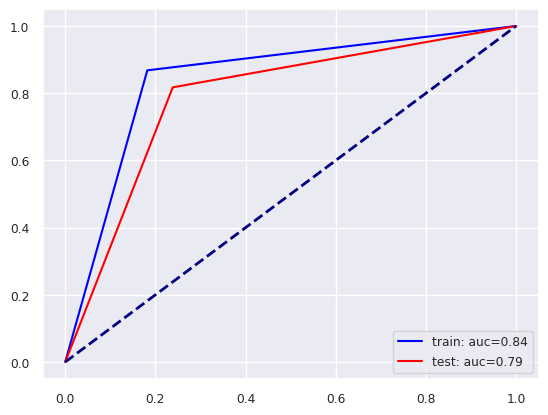

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       379
           1       0.82      0.88      0.85       379

    accuracy                           0.84       758
   macro avg       0.85      0.84      0.84       758
weighted avg       0.85      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1258
           1       0.39      0.83      0.53       252

    accuracy                           0.76      1510
   macro avg       0.67      0.79      0.69      1510
weighted avg       0.86      0.76      0.79      1510



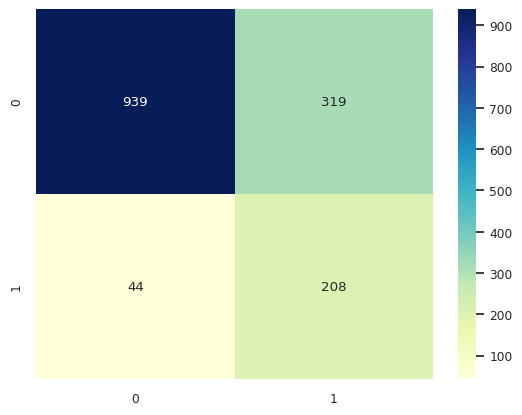

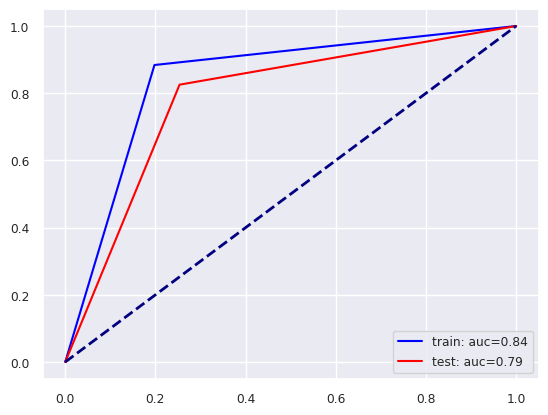

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       379
           1       0.71      0.87      0.78       379

    accuracy                           0.76       758
   macro avg       0.77      0.76      0.75       758
weighted avg       0.77      0.76      0.75       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1258
           1       0.29      0.81      0.43       252

    accuracy                           0.64      1510
   macro avg       0.62      0.71      0.58      1510
weighted avg       0.83      0.64      0.69      1510



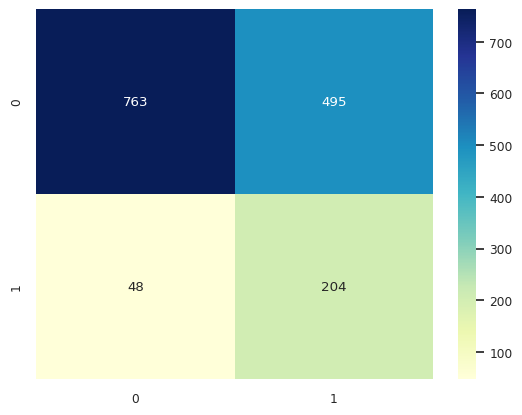

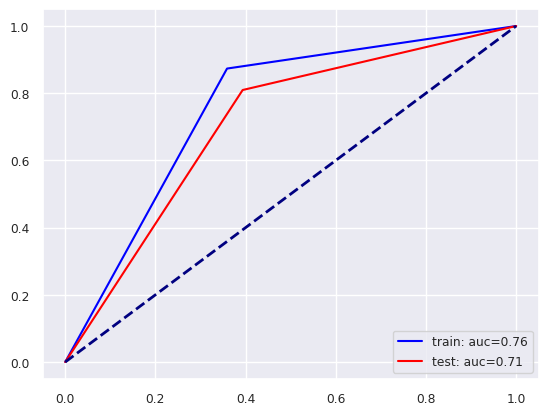

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       379
           1       0.82      0.87      0.85       379

    accuracy                           0.84       758
   macro avg       0.84      0.84      0.84       758
weighted avg       0.84      0.84      0.84       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1258
           1       0.41      0.83      0.54       252

    accuracy                           0.77      1510
   macro avg       0.68      0.79      0.70      1510
weighted avg       0.86      0.77      0.80      1510



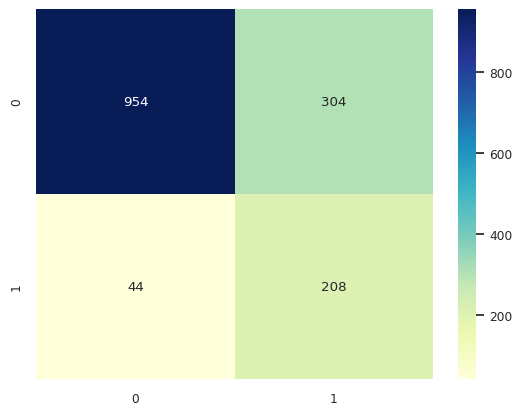

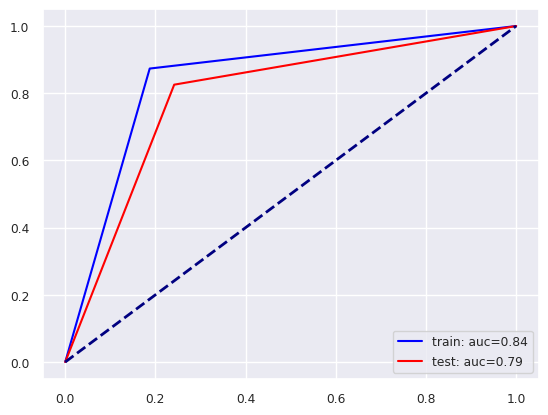

----------------------------------------------------------------------------------------------------
Best model with random undersampling: XGBoost, AUC: 0.79


In [35]:
smote = SMOTE(random_state=0)

best_score = 0
best_model_name = ""

# Loop through classifiers and evaluate
for clf, clf_name in classifiers:
  X_train_SMOTE, y_train_SMOTE = rus.fit_resample(X_train, y_train)

  # Evaluate the classifier with random undersampling
  auc_test = fit_evaluate(clf, X_train_SMOTE, X_test, y_train_SMOTE, y_test)
  print('-' * 100)

  if auc_test > best_score:
        best_score = auc_test
        best_model_name = clf_name

print(f"Best model with random undersampling: {best_model_name}, AUC: {best_score:.2f}")

## Feature Importance

Feature Importance Ranking:
1. Tenure: 0.7778145670890808
2. Complain: 0.2221853882074356


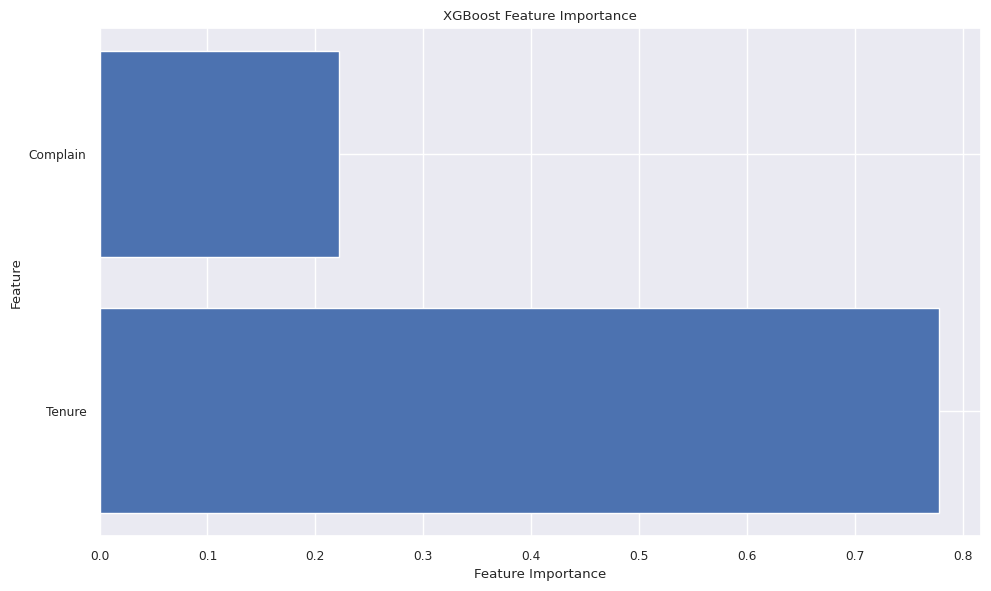

In [36]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the classifier to the data
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names
feature_names = X_train_SMOTE.columns

# Sort indices of features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i + 1}. {feature_names[idx]}: {feature_importances[idx]}")

# Plot feature importance horizontally
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.ylabel("Feature")
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()